SPLITTING DATASET

In [12]:
import os
import random
import shutil
from pathlib import Path

# Configuration
dataset_path = "./dataset"  # root folder
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Configuration
train_ratio = 0.8  # 80% for training
val_ratio = 0.1  # 10% for validation
test_ratio = 0.1  # 10% for testing

# Output folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(images_path, split), exist_ok=True)
    os.makedirs(os.path.join(labels_path, split), exist_ok=True)

# List all image files
all_images = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Shuffle to ensure randomness
random.seed(42)
random.shuffle(all_images)

# Split into train/val/test
train_split = int(len(all_images) * train_ratio)
val_split = int(len(all_images) * (train_ratio + val_ratio))

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

def move_files(image_list, split):
    for image_file in image_list:
        # Paths
        src_img = os.path.join(images_path, image_file)
        dst_img = os.path.join(images_path, split, image_file)

        label_file = Path(image_file).with_suffix('.txt')
        src_lbl = os.path.join(labels_path, label_file)
        dst_lbl = os.path.join(labels_path, split, label_file)

        # Move image and corresponding label
        if os.path.exists(src_lbl):
            shutil.move(src_img, dst_img)
            shutil.move(src_lbl, dst_lbl)
        else:
            print(f"Label not found for {image_file}, skipping.")

# Move files
# Move files to respective folders
move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")

print(f"✅ Done. {len(train_images)} training, {len(val_images)} validation, and {len(test_images)} testing images split.")


✅ Done. 9920 training, 1240 validation, and 1241 testing images split.


In [4]:
import yaml

yaml_content = {
    'path': 'D:/TpRN/Projet/projetamine/dataset',  # Root path to the dataset folder
    'train': 'images/train',
    'val': 'images/val',
    'nc': 1,
    'names': ['hand']
}

# Save the YAML file
with open('hand.yaml', 'w') as f:
    yaml.dump(yaml_content, f)

print("✅ 'hand.yaml' has been created.")


✅ 'hand.yaml' has been created.


In [1]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")  

# Train the model
model.train(
    data="hand.yaml",
    epochs=50,
    imgsz=256,
    batch=16,
    name="yolov8_hand_detector",
    device=0
)


Ultralytics 8.3.132  Python-3.10.14 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=hand.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_hand_detector6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

train: Scanning D:\TpRN\Projet\projetamine\dataset\labels\train.cache... 9920 images, 0 backgrounds, 16 corrupt: 100%|██████████| 9920/9920 [00:00<?, ?it/s]

train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_11_3190.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0213]
train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_11_3206.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0204]
train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_11_3725.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0072]
train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_12_4201.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0087]
train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_13_5189.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0306]
train: D:\TpRN\Projet\projetamine\dataset\images\train\Gesture_13_5190.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0141]
train: D:\TpRN\P

val: Fast image access  (ping: 0.10.0 ms, read: 95.930.7 MB/s, size: 18.1 KB)


val: Scanning D:\TpRN\Projet\projetamine\dataset\labels\val.cache... 1240 images, 0 backgrounds, 3 corrupt: 100%|██████████| 1240/1240 [00:00<?, ?it/s]

val: D:\TpRN\Projet\projetamine\dataset\images\val\Gesture_3_7313.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0193]
val: D:\TpRN\Projet\projetamine\dataset\images\val\Gesture_4_8301.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0009]
val: D:\TpRN\Projet\projetamine\dataset\images\val\Gesture_5_9316.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0158]


Plotting labels to runs\detect\yolov8_hand_detector6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs\detect\yolov8_hand_detector6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.45G      1.036     0.6777      1.285         33        256: 100%|██████████| 619/619 [01:34<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.41it/s]

                   all       1237       1237      0.878      0.881      0.944      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.73G     0.9779     0.6068      1.249         40        256: 100%|██████████| 619/619 [01:24<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.89it/s]

                   all       1237       1237       0.96      0.971      0.988      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.75G     0.9338     0.5673      1.227         32        256: 100%|██████████| 619/619 [01:21<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all       1237       1237      0.992      0.994      0.994      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.8G     0.8842      0.523      1.193         34        256: 100%|██████████| 619/619 [01:20<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.92it/s]

                   all       1237       1237      0.998      0.997      0.993      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.91G     0.8482     0.4967      1.172         41        256: 100%|██████████| 619/619 [01:20<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all       1237       1237      0.996      0.995      0.994      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.91G     0.8194     0.4822       1.16         43        256: 100%|██████████| 619/619 [01:20<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.82it/s]

                   all       1237       1237      0.997      0.997      0.994      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.91G     0.8028     0.4721      1.151         37        256: 100%|██████████| 619/619 [01:22<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all       1237       1237      0.997      0.997      0.994      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.91G     0.7811     0.4559      1.137         31        256: 100%|██████████| 619/619 [01:21<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all       1237       1237      0.995      0.998      0.994      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.91G     0.7698     0.4471       1.13         40        256: 100%|██████████| 619/619 [01:19<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all       1237       1237      0.998      0.998      0.993      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.91G     0.7577     0.4401      1.124         33        256: 100%|██████████| 619/619 [01:20<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.04it/s]

                   all       1237       1237      0.993      0.998      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.91G     0.7414     0.4328      1.114         36        256: 100%|██████████| 619/619 [01:20<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.78it/s]

                   all       1237       1237      0.997      0.998      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.91G     0.7282     0.4275       1.11         36        256: 100%|██████████| 619/619 [01:22<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.41it/s]

                   all       1237       1237      0.998      0.998      0.994      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.91G     0.7253       0.42      1.112         34        256: 100%|██████████| 619/619 [01:19<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.86it/s]

                   all       1237       1237      0.998      0.998      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.91G      0.718     0.4208       1.11         40        256: 100%|██████████| 619/619 [01:23<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.48it/s]

                   all       1237       1237      0.998      0.998      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.91G      0.712     0.4145      1.103         32        256: 100%|██████████| 619/619 [01:21<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all       1237       1237      0.998      0.998      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.91G     0.7061     0.4113        1.1         32        256: 100%|██████████| 619/619 [01:21<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all       1237       1237      0.998      0.998      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.91G      0.694     0.4091      1.096         44        256: 100%|██████████| 619/619 [01:19<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.98it/s]

                   all       1237       1237      0.998      0.998      0.994      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.96G     0.6851     0.3948      1.088         33        256: 100%|██████████| 619/619 [01:21<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.45it/s]

                   all       1237       1237      0.998      0.998      0.994      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.96G     0.6813     0.3976      1.089         34        256: 100%|██████████| 619/619 [01:20<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all       1237       1237      0.998      0.998      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.96G     0.6739     0.3945      1.082         42        256: 100%|██████████| 619/619 [01:19<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all       1237       1237      0.997      0.998      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.96G     0.6666     0.3843      1.081         45        256: 100%|██████████| 619/619 [01:20<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.99it/s]

                   all       1237       1237      0.998      0.998      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.96G      0.655     0.3792      1.077         33        256: 100%|██████████| 619/619 [01:20<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all       1237       1237      0.998      0.998      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.96G     0.6583     0.3804      1.078         41        256: 100%|██████████| 619/619 [01:21<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.54it/s]

                   all       1237       1237      0.998      0.998      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.96G      0.654     0.3808      1.078         36        256: 100%|██████████| 619/619 [01:20<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all       1237       1237      0.996      0.998      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.96G     0.6475     0.3736      1.073         39        256: 100%|██████████| 619/619 [01:20<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.91it/s]

                   all       1237       1237      0.997      0.998      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.96G     0.6378     0.3726      1.065         39        256: 100%|██████████| 619/619 [01:19<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.92it/s]

                   all       1237       1237      0.998      0.998      0.994      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.96G     0.6406     0.3756      1.072         29        256: 100%|██████████| 619/619 [01:20<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.01it/s]

                   all       1237       1237      0.997      0.998      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.96G     0.6338     0.3666      1.064         40        256: 100%|██████████| 619/619 [01:20<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.46it/s]

                   all       1237       1237      0.998      0.998      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.96G     0.6218     0.3557      1.059         35        256: 100%|██████████| 619/619 [01:19<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.05it/s]

                   all       1237       1237      0.998      0.998      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.96G     0.6148     0.3576      1.055         34        256: 100%|██████████| 619/619 [01:21<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.05it/s]

                   all       1237       1237      0.998      0.998      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.96G     0.6144     0.3557      1.058         36        256: 100%|██████████| 619/619 [01:19<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.00it/s]

                   all       1237       1237      0.996      0.998      0.994       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.96G     0.6115     0.3614      1.053         34        256: 100%|██████████| 619/619 [01:21<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all       1237       1237      0.997      0.998      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.96G     0.6029     0.3516       1.05         36        256: 100%|██████████| 619/619 [01:21<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.54it/s]

                   all       1237       1237      0.997      0.998      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.96G     0.5994     0.3471      1.047         48        256: 100%|██████████| 619/619 [01:19<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.45it/s]

                   all       1237       1237      0.996      0.998      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.96G     0.5937     0.3373      1.045         32        256: 100%|██████████| 619/619 [01:20<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.99it/s]

                   all       1237       1237      0.998      0.998      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.96G     0.5907     0.3437      1.047         36        256: 100%|██████████| 619/619 [01:19<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.93it/s]

                   all       1237       1237      0.998      0.998      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.96G     0.5893     0.3424      1.044         39        256: 100%|██████████| 619/619 [01:29<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.35it/s]

                   all       1237       1237      0.998      0.998      0.994      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.96G     0.5749     0.3308      1.039         34        256: 100%|██████████| 619/619 [01:21<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.00it/s]

                   all       1237       1237      0.998      0.998      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.96G      0.583     0.3316      1.042         40        256: 100%|██████████| 619/619 [01:22<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.43it/s]

                   all       1237       1237      0.998      0.998      0.994       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.96G     0.5648     0.3283      1.032         45        256: 100%|██████████| 619/619 [01:22<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all       1237       1237      0.998      0.998      0.994      0.952


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.96G     0.3592     0.1802     0.9223         16        256: 100%|██████████| 619/619 [01:20<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all       1237       1237      0.998      0.998      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.96G     0.3506     0.1721     0.9234         16        256: 100%|██████████| 619/619 [01:20<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all       1237       1237      0.998      0.998      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.96G      0.341     0.1661     0.9157         16        256: 100%|██████████| 619/619 [01:20<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.80it/s]

                   all       1237       1237      0.999      0.999      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.96G     0.3355     0.1632     0.9077         16        256: 100%|██████████| 619/619 [01:19<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.05it/s]

                   all       1237       1237      0.998      0.999      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.96G     0.3268     0.1582      0.906         16        256: 100%|██████████| 619/619 [01:20<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.68it/s]

                   all       1237       1237      0.998      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.96G     0.3195      0.152     0.8988         16        256: 100%|██████████| 619/619 [01:19<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all       1237       1237      0.998      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.96G     0.3157     0.1501     0.9023         16        256: 100%|██████████| 619/619 [01:19<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.78it/s]

                   all       1237       1237      0.998      0.999      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.96G     0.3106     0.1464      0.898         16        256: 100%|██████████| 619/619 [01:21<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.89it/s]

                   all       1237       1237      0.999      0.999      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.96G      0.307     0.1437     0.8969         16        256: 100%|██████████| 619/619 [01:20<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.86it/s]

                   all       1237       1237      0.999      0.999      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.96G     0.2998      0.141     0.8941         16        256: 100%|██████████| 619/619 [01:18<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.03it/s]

                   all       1237       1237      0.999      0.999      0.995      0.963



50 epochs completed in 1.263 hours.
Optimizer stripped from runs\detect\yolov8_hand_detector6\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\yolov8_hand_detector6\weights\best.pt, 52.0MB

Validating runs\detect\yolov8_hand_detector6\weights\best.pt...
Ultralytics 8.3.132  Python-3.10.14 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.18it/s]


                   all       1237       1237      0.999      0.999      0.995      0.963
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\yolov8_hand_detector6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002486763C7C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480


image 1/1 d:\TpRN\Projet\projetamine\test\testimages\Gesture_0_243.jpg: 256x256 1 hand, 47.1ms
Speed: 0.7ms preprocess, 47.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


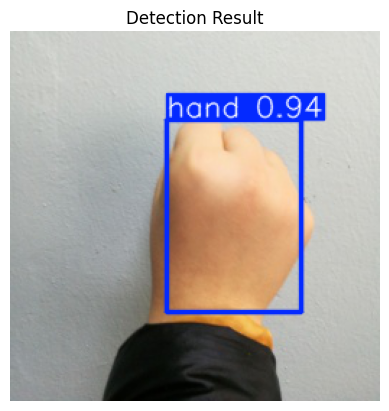

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("./models/yolo_hand_detector.pt")

# Path to a test image
image_path = "./test/testimages/Gesture_0_243.jpg"

# Run inference
results = model(image_path, save=False, conf=0.5)  # adjust confidence threshold if needed

# Visualize the result
for result in results:
    annotated_img = result.plot()  # draws bounding boxes and labels
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detection Result")
    plt.show()



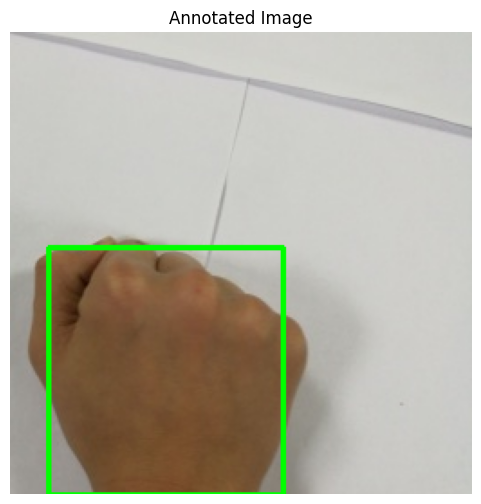

In [2]:
import cv2
import torch
import numpy as np

# Load original image (in BGR for OpenCV)
image_path = './test/testimages/Gesture_0_105.jpg'
image = cv2.imread(image_path)

# Get bounding box tensor (assuming 1 detection for now)
boxes = torch.tensor([[21.3999, 119.9081, 151.2546, 256.0000]], device='cuda:0')

# Move to CPU and convert to int for drawing
box = boxes[0].cpu().numpy().astype(int)

# Draw rectangle: (x1, y1), (x2, y2)
cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), color=(0, 255, 0), thickness=2)

# Optionally display or save image
import matplotlib.pyplot as plt

# Convert BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Annotated Image")
plt.axis('off')
plt.show()

# cv2.imwrite("output.jpg", image)  # Save if needed


test accuracy

In [3]:
import os
import cv2
import torch
import numpy as np
from pathlib import Path
from ultralytics import YOLO

# Helper: Convert YOLO to [x1, y1, x2, y2]
def yolo_to_xyxy(box, w, h):
    cx, cy, bw, bh = box
    x1 = int((cx - bw / 2) * w)
    y1 = int((cy - bh / 2) * h)
    x2 = int((cx + bw / 2) * w)
    y2 = int((cy + bh / 2) * h)
    return [x1, y1, x2, y2]

# Helper: IoU calculation
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

# Paths
image_dir = Path("./test/testimages/")
label_dir = Path("./test/testlabels/")
model = YOLO("./models/yolo_hand_detector.pt")
model.to("cuda")
model.eval()

# Evaluation counters
total_boxes = 0
correct_boxes = 0
iou_threshold = 0.5

for image_path in image_dir.glob("*.jpg"):
    image = cv2.imread(str(image_path))
    h, w = image.shape[:2]
    
    # Ground truth boxes
    label_path = label_dir / (image_path.stem + ".txt")
    gt_boxes = []
    with open(label_path, "r") as f:
        for line in f:
            class_id, xc, yc, bw, bh = map(float, line.strip().split())
            gt_boxes.append(yolo_to_xyxy([xc, yc, bw, bh], w, h))
    
    # Model inference
    results = model(image)
    pred_boxes = results[0].boxes.xyxy   # remove conf, class

    total_boxes += len(gt_boxes)
    
    # Match predictions to ground truths using IoU
    matched = [False] * len(gt_boxes)
    for pb in pred_boxes:
        for i, gb in enumerate(gt_boxes):
            if not matched[i] and compute_iou(pb, gb) >= iou_threshold:
                correct_boxes += 1
                matched[i] = True
                break

accuracy = correct_boxes / total_boxes * 100
print(f"Detection Accuracy (IoU > {iou_threshold}): {accuracy:.2f}%")



0: 256x256 1 hand, 39.4ms
Speed: 2.6ms preprocess, 39.4ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 38.5ms
Speed: 1.4ms preprocess, 38.5ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 38.3ms
Speed: 2.6ms preprocess, 38.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 37.1ms
Speed: 1.0ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 37.0ms
Speed: 1.0ms preprocess, 37.0ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 37.2ms
Speed: 1.1ms preprocess, 37.2ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 19.8ms
Speed: 1.0ms preprocess, 19.8ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 hand, 18.5ms
Speed: 0.6ms preprocess, 18.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x

REAL TIME DETETCTION WITH YOLO

In [22]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your fine-tuned YOLOv8 model
model = YOLO("./models/yolo_hand_detector.pt")

# Open the laptop camera (usually 0 is the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    results = model(frame)
    
    # Extract the predictions
    boxes = results[0].boxes.xyxy  # Get the bounding boxes (xyxy format)
    labels = results[0].boxes.cls  # Get the class labels
    confidences = results[0].boxes.conf  # Get the confidence scores

    # Draw bounding boxes on the frame
    for i in range(len(boxes)):
        # Get the coordinates of the bounding box
        x1, y1, x2, y2 = boxes[i]
        label = int(labels[i])  # Class index (hand class, for example)
        confidence = confidences[i]

        # Draw the rectangle (bounding box) on the frame
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # Add a label with the confidence score
        cv2.putText(frame, f'{model.names[label]} {confidence:.2f}', (int(x1), int(y1)-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Hand Detection', frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()



0: 192x256 1 hand, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 2.8ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 3 hands, 14.2ms
Speed: 1.5ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 3 hands, 16.8ms
Speed: 1.1ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 3 hands, 27.3ms
Speed: 1.4ms preprocess, 27.3ms inference, 5.0ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 3 hands, 13.1ms
Speed: 1.0ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 5 hands, 14.1ms
Speed: 1.0ms preprocess, 14.1ms inference, 2.8ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 4 hands, 13.8ms
Speed: 1.1ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 256)

0: 192x256 3 hands, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 6.9ms postprocess per image at shape (1, 3, 192, 256)



SPLIT DATATSET 2

In [5]:
import os
import shutil
import random
from pathlib import Path

# Paths
SOURCE_DIR = "D:/TpRN/Projet/archive (2)/HG14/HG14-Hand Gesture"  # Folder containing 14 class folders
DEST_DIR = "./split_dataset"       # Output folder for split dataset

# Split ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Create the split directories
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(SOURCE_DIR):
        class_path = os.path.join(SOURCE_DIR, class_name)
        if os.path.isdir(class_path):
            split_class_path = os.path.join(DEST_DIR, split, class_name)
            os.makedirs(split_class_path, exist_ok=True)

# Process each class
for class_name in os.listdir(SOURCE_DIR):
    class_path = os.path.join(SOURCE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * TRAIN_RATIO)
    n_val = int(n_total * VAL_RATIO)

    train_files = images[:n_train]
    val_files = images[n_train:n_train + n_val]
    test_files = images[n_train + n_val:]

    # Copy files
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(DEST_DIR, 'train', class_name, file))
    for file in val_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(DEST_DIR, 'val', class_name, file))
    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(DEST_DIR, 'test', class_name, file))

print("✅ Dataset split complete.")


✅ Dataset split complete.


CREATING DATASET LABELS

In [4]:
import os
import cv2
from ultralytics import YOLO

# Function to expand and crop box
def expand_crop_and_resize(image, box, output_size=(224, 224), margin=0.07):
    h, w = image.shape[:2]
    x1, y1, x2, y2 = box
    bw, bh = x2 - x1, y2 - y1
    x1 = max(0, int(x1 - bw * margin))
    y1 = max(0, int(y1 - bh * margin))
    x2 = min(w, int(x2 + bw * margin))
    y2 = min(h, int(y2 + bh * margin))
    
    cropped = image[y1:y2, x1:x2]
    resized = cv2.resize(cropped, output_size)
    return resized


# Load YOLO model
model = YOLO("./models/yolo_hand_detector.pt")

# Directories for input and output
splits = ['train', 'val']
base_input_dir = './split_dataset/'
base_output_dir = './cropped_dataset'

for split in splits:
    input_dir = os.path.join(base_input_dir, split)
    output_dir = os.path.join(base_output_dir, split)

    for class_name in os.listdir(input_dir):
        class_input_path = os.path.join(input_dir, class_name)
        class_output_path = os.path.join(output_dir, class_name)
        os.makedirs(class_output_path, exist_ok=True)

        image_files = [f for f in os.listdir(class_input_path) if f.endswith('.jpg')]

        for img_file in image_files:
            img_path = os.path.join(class_input_path, img_file)
            image = cv2.imread(img_path)

            if image is None:
                continue

            results = model(img_path)[0]
            boxes = results.boxes.xyxy.cpu().numpy()

            if len(boxes) > 0:
                x1, y1, x2, y2 = boxes[0]
                cropped_img = expand_crop_and_resize(image, [x1, y1, x2, y2])
                out_path = os.path.join(class_output_path, img_file)
                cv2.imwrite(out_path, cropped_img)



image 1/1 d:\TpRN\Projet\projetamine\split_dataset\train\Gesture_0\0001.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\train\Gesture_0\0002.jpg: 256x256 1 hand, 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\train\Gesture_0\0003.jpg: 256x256 1 hand, 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\train\Gesture_0\0004.jpg: 256x256 1 hand, 11.8ms
Speed: 0.5ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\train\Gesture_0\0005.jpg: 256x256 1 hand, 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1

TRAINING CLASSIFICATION MODEL

In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths to the cropped datasets
data_dir = "./cropped_dataset"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Data transforms
input_size = 224
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Datasets and loaders
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load MobileNetV2 with pretrained weights
model = models.mobilenet_v2(pretrained=True)
num_classes = 14
model.classifier[1] = nn.Linear(model.last_channel, num_classes)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}\n")

    return model

# Train
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Save the model
torch.save(trained_model.state_dict(), "mobilenetv2_hand_gesture.pth")


c:\Users\ramin\anaconda3\envs\tensorflowgpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ramin\anaconda3\envs\tensorflowgpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\ramin/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:04<00:00, 3.25MB/s]


Epoch 1/10
----------


100%|██████████| 307/307 [00:41<00:00,  7.36it/s]


Train Loss: 0.4800 Acc: 0.8759
Val   Loss: 0.0518 Acc: 0.9914

Epoch 2/10
----------


100%|██████████| 307/307 [00:40<00:00,  7.49it/s]


Train Loss: 0.0399 Acc: 0.9931
Val   Loss: 0.0150 Acc: 0.9986

Epoch 3/10
----------


100%|██████████| 307/307 [00:39<00:00,  7.78it/s]


Train Loss: 0.0159 Acc: 0.9972
Val   Loss: 0.0085 Acc: 0.9990

Epoch 4/10
----------


100%|██████████| 307/307 [00:41<00:00,  7.41it/s]


Train Loss: 0.0089 Acc: 0.9988
Val   Loss: 0.0081 Acc: 0.9986

Epoch 5/10
----------


100%|██████████| 307/307 [00:38<00:00,  7.91it/s]


Train Loss: 0.0072 Acc: 0.9993
Val   Loss: 0.0118 Acc: 0.9976

Epoch 6/10
----------


100%|██████████| 307/307 [00:39<00:00,  7.86it/s]


Train Loss: 0.0104 Acc: 0.9979
Val   Loss: 0.0118 Acc: 0.9976

Epoch 7/10
----------


100%|██████████| 307/307 [00:40<00:00,  7.63it/s]


Train Loss: 0.0047 Acc: 0.9994
Val   Loss: 0.0080 Acc: 0.9986

Epoch 8/10
----------


100%|██████████| 307/307 [00:40<00:00,  7.67it/s]


Train Loss: 0.0074 Acc: 0.9980
Val   Loss: 0.0120 Acc: 0.9976

Epoch 9/10
----------


100%|██████████| 307/307 [00:39<00:00,  7.82it/s]


Train Loss: 0.0112 Acc: 0.9972
Val   Loss: 0.0068 Acc: 0.9990

Epoch 10/10
----------


100%|██████████| 307/307 [00:38<00:00,  8.03it/s]


Train Loss: 0.0062 Acc: 0.9987
Val   Loss: 0.0076 Acc: 0.9990



PIPELINE EVALUATION

In [10]:
import os
import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm

# Paths
test_root = "./split_dataset/test/"
mobilenet_model_path = "./mobilenetv2_hand_gesture.pth"
yolo_model_path = "./models/yolo_hand_detector.pt"

# Classes (adjust this list based on your actual class folder names)
class_names = sorted(os.listdir(test_root))
num_classes = len(class_names)
class_to_idx = {name: idx for idx, name in enumerate(class_names)}

# Set device to CPU
device = torch.device("cpu")

# Load YOLO model
yolo_model = YOLO(yolo_model_path)

# Load MobileNetV2 model
mobilenet_model = models.mobilenet_v2(weights=None)
mobilenet_model.classifier[1] = nn.Linear(mobilenet_model.last_channel, num_classes)
mobilenet_model.load_state_dict(torch.load(mobilenet_model_path, map_location=device))
mobilenet_model.to(device)
mobilenet_model.eval()

# Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Function to expand box slightly
def expand_box(box, img_width, img_height, margin=0.07):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    x1 = max(0, x1 - w * margin)
    y1 = max(0, y1 - h * margin)
    x2 = min(img_width, x2 + w * margin)
    y2 = min(img_height, y2 + h * margin)
    return [int(x1), int(y1), int(x2), int(y2)]

# Evaluation
correct = 0
total = 0

for class_name in class_names:
    class_dir = os.path.join(test_root, class_name)
    for img_name in tqdm(os.listdir(class_dir), desc=f"Evaluating {class_name}"):
        img_path = os.path.join(class_dir, img_name)

        # Load image
        image = cv2.imread(img_path)
        if image is None:
            continue
        img_height, img_width = image.shape[:2]

        # YOLO detection
        result = yolo_model(img_path)[0]
        boxes = result.boxes.xyxy.cpu().numpy()

        if len(boxes) == 0:
            continue  # Skip if no hands detected

        # Use first box
        x1, y1, x2, y2 = expand_box(boxes[0], img_width, img_height)
        cropped = image[y1:y2, x1:x2]
        cropped_pil = Image.fromarray(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

        # Transform and predict
        input_tensor = transform(cropped_pil).unsqueeze(0).to(device)
        with torch.no_grad():
            output = mobilenet_model(input_tensor)
            pred_class = output.argmax(dim=1).item()

        # Compare with ground truth
        if pred_class == class_to_idx[class_name]:
            correct += 1
        total += 1

# Final accuracy
accuracy = correct / total if total else 0
print(f"\nTest Accuracy: {accuracy * 100:.2f}%  ({correct}/{total})")


Evaluating Gesture_0:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0000.jpg: 256x256 1 hand, 47.5ms
Speed: 1.4ms preprocess, 47.5ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   1%|          | 1/150 [00:00<02:11,  1.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0006.jpg: 256x256 1 hand, 16.5ms
Speed: 0.7ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0012.jpg: 256x256 1 hand, 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   2%|▏         | 3/150 [00:01<00:40,  3.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0013.jpg: 256x256 1 hand, 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0014.jpg: 256x256 1 hand, 11.2ms
Speed: 0.4ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   3%|▎         | 5/150 [00:01<00:24,  5.99it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0019.jpg: 256x256 1 hand, 11.2ms
Speed: 0.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0021.jpg: 256x256 1 hand, 11.1ms
Speed: 0.4ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   5%|▍         | 7/150 [00:01<00:17,  8.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0026.jpg: 256x256 1 hand, 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0037.jpg: 256x256 1 hand, 21.9ms
Speed: 0.6ms preprocess, 21.9ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   6%|▌         | 9/150 [00:01<00:14,  9.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0041.jpg: 256x256 1 hand, 11.5ms
Speed: 0.4ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0050.jpg: 256x256 1 hand, 11.1ms
Speed: 0.4ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   7%|▋         | 11/150 [00:01<00:12, 11.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0054.jpg: 256x256 1 hand, 11.9ms
Speed: 0.5ms preprocess, 11.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0065.jpg: 256x256 1 hand, 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:   9%|▊         | 13/150 [00:01<00:11, 12.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0085.jpg: 256x256 1 hand, 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0096.jpg: 256x256 1 hand, 12.8ms
Speed: 0.4ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  10%|█         | 15/150 [00:01<00:10, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0098.jpg: 256x256 1 hand, 11.9ms
Speed: 0.5ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0106.jpg: 256x256 1 hand, 11.2ms
Speed: 0.4ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  11%|█▏        | 17/150 [00:01<00:09, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0110.jpg: 256x256 1 hand, 11.1ms
Speed: 0.4ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0111.jpg: 256x256 1 hand, 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  13%|█▎        | 19/150 [00:02<00:09, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0122.jpg: 256x256 1 hand, 11.1ms
Speed: 0.4ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0124.jpg: 256x256 1 hand, 11.0ms
Speed: 0.4ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  14%|█▍        | 21/150 [00:02<00:08, 14.35it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0125.jpg: 256x256 1 hand, 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0132.jpg: 256x256 1 hand, 24.0ms
Speed: 0.6ms preprocess, 24.0ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  15%|█▌        | 23/150 [00:02<00:08, 14.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0140.jpg: 256x256 1 hand, 11.2ms
Speed: 0.4ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0152.jpg: 256x256 1 hand, 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  17%|█▋        | 25/150 [00:02<00:08, 14.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0155.jpg: 256x256 1 hand, 11.1ms
Speed: 0.5ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0156.jpg: 256x256 1 hand, 11.2ms
Speed: 0.5ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  18%|█▊        | 27/150 [00:02<00:08, 15.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0162.jpg: 256x256 1 hand, 19.7ms
Speed: 0.5ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0176.jpg: 256x256 1 hand, 19.8ms
Speed: 0.5ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  19%|█▉        | 29/150 [00:02<00:08, 14.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0186.jpg: 256x256 1 hand, 19.6ms
Speed: 0.5ms preprocess, 19.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0187.jpg: 256x256 1 hand, 19.9ms
Speed: 0.5ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  21%|██        | 31/150 [00:02<00:08, 14.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0191.jpg: 256x256 1 hand, 19.9ms
Speed: 0.5ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0200.jpg: 256x256 1 hand, 19.9ms
Speed: 0.6ms preprocess, 19.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  22%|██▏       | 33/150 [00:03<00:08, 14.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0219.jpg: 256x256 1 hand, 19.8ms
Speed: 0.5ms preprocess, 19.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0221.jpg: 256x256 1 hand, 20.0ms
Speed: 0.5ms preprocess, 20.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  23%|██▎       | 35/150 [00:03<00:08, 14.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0227.jpg: 256x256 1 hand, 20.0ms
Speed: 0.5ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0231.jpg: 256x256 1 hand, 20.2ms
Speed: 0.6ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  25%|██▍       | 37/150 [00:03<00:08, 14.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0240.jpg: 256x256 1 hand, 20.2ms
Speed: 0.9ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0246.jpg: 256x256 1 hand, 20.3ms
Speed: 1.0ms preprocess, 20.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  26%|██▌       | 39/150 [00:03<00:07, 14.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0248.jpg: 256x256 1 hand, 20.5ms
Speed: 1.1ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0256.jpg: 256x256 1 hand, 20.5ms
Speed: 0.9ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  27%|██▋       | 41/150 [00:03<00:07, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0263.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0264.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  29%|██▊       | 43/150 [00:03<00:07, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0270.jpg: 256x256 1 hand, 20.7ms
Speed: 3.1ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0279.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  30%|███       | 45/150 [00:03<00:07, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0283.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0287.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  31%|███▏      | 47/150 [00:04<00:07, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0288.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0300.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  33%|███▎      | 49/150 [00:04<00:07, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0303.jpg: 256x256 1 hand, 21.6ms
Speed: 1.9ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0307.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  34%|███▍      | 51/150 [00:04<00:07, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0311.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0322.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  35%|███▌      | 53/150 [00:04<00:07, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0324.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0328.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  37%|███▋      | 55/150 [00:04<00:07, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0330.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0333.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  38%|███▊      | 57/150 [00:04<00:06, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0340.jpg: 256x256 1 hand, 22.1ms
Speed: 0.8ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0345.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  39%|███▉      | 59/150 [00:04<00:06, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0351.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0356.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  41%|████      | 61/150 [00:05<00:06, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0362.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0372.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  42%|████▏     | 63/150 [00:05<00:06, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0383.jpg: 256x256 1 hand, 22.3ms
Speed: 1.4ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0385.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  43%|████▎     | 65/150 [00:05<00:06, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0397.jpg: 256x256 1 hand, 26.5ms
Speed: 0.9ms preprocess, 26.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0400.jpg: 256x256 1 hand, 38.4ms
Speed: 1.1ms preprocess, 38.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  45%|████▍     | 67/150 [00:05<00:06, 12.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0401.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0410.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  46%|████▌     | 69/150 [00:05<00:06, 12.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0423.jpg: 256x256 1 hand, 21.8ms
Speed: 1.2ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0425.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  47%|████▋     | 71/150 [00:05<00:06, 12.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0426.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0436.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  49%|████▊     | 73/150 [00:06<00:05, 13.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0439.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0455.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  50%|█████     | 75/150 [00:06<00:05, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0469.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0470.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  51%|█████▏    | 77/150 [00:06<00:05, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0474.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0481.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  53%|█████▎    | 79/150 [00:06<00:05, 13.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0482.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0498.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  54%|█████▍    | 81/150 [00:06<00:05, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0504.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0519.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  55%|█████▌    | 83/150 [00:06<00:05, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0528.jpg: 256x256 1 hand, 22.0ms
Speed: 1.3ms preprocess, 22.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0531.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  57%|█████▋    | 85/150 [00:06<00:04, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0535.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0541.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  58%|█████▊    | 87/150 [00:07<00:04, 13.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0550.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0565.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  59%|█████▉    | 89/150 [00:07<00:04, 13.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0580.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 3.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0581.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  61%|██████    | 91/150 [00:07<00:04, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0583.jpg: 256x256 1 hand, 24.2ms
Speed: 0.9ms preprocess, 24.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0591.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  62%|██████▏   | 93/150 [00:07<00:04, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0597.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0601.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  63%|██████▎   | 95/150 [00:07<00:04, 12.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0606.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0621.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  65%|██████▍   | 97/150 [00:07<00:04, 12.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0632.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0644.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  66%|██████▌   | 99/150 [00:08<00:03, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0646.jpg: 256x256 1 hand, 22.1ms
Speed: 1.2ms preprocess, 22.1ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0655.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  67%|██████▋   | 101/150 [00:08<00:03, 13.02it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0657.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0668.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  69%|██████▊   | 103/150 [00:08<00:03, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0669.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0670.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  70%|███████   | 105/150 [00:08<00:03, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0678.jpg: 256x256 1 hand, 22.0ms
Speed: 1.1ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0680.jpg: 256x256 1 hand, 21.9ms
Speed: 0.7ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  71%|███████▏  | 107/150 [00:08<00:03, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0683.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0685.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  73%|███████▎  | 109/150 [00:08<00:03, 13.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0692.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0704.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  74%|███████▍  | 111/150 [00:08<00:02, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0713.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0716.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  75%|███████▌  | 113/150 [00:09<00:02, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0723.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0729.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  77%|███████▋  | 115/150 [00:09<00:02, 12.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0751.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0773.jpg: 256x256 1 hand, 22.0ms
Speed: 1.3ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  78%|███████▊  | 117/150 [00:09<00:02, 12.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0777.jpg: 256x256 1 hand, 30.2ms
Speed: 1.8ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0779.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  79%|███████▉  | 119/150 [00:09<00:02, 12.51it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0780.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0783.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  81%|████████  | 121/150 [00:09<00:02, 12.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0790.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0805.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  82%|████████▏ | 123/150 [00:09<00:02, 12.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0812.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0816.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  83%|████████▎ | 125/150 [00:10<00:01, 12.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0824.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0826.jpg: 256x256 1 hand, 21.6ms
Speed: 1.4ms preprocess, 21.6ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  85%|████████▍ | 127/150 [00:10<00:01, 13.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0827.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0829.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  86%|████████▌ | 129/150 [00:10<00:01, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0835.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0852.jpg: 256x256 1 hand, 21.5ms
Speed: 0.6ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  87%|████████▋ | 131/150 [00:10<00:01, 13.34it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0855.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0875.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  89%|████████▊ | 133/150 [00:10<00:01, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0878.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0879.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  90%|█████████ | 135/150 [00:10<00:01, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0897.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0898.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  91%|█████████▏| 137/150 [00:10<00:00, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0922.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0923.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  93%|█████████▎| 139/150 [00:11<00:00, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0931.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0936.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  94%|█████████▍| 141/150 [00:11<00:00, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0937.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0944.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  95%|█████████▌| 143/150 [00:11<00:00, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0957.jpg: 256x256 1 hand, 38.7ms
Speed: 0.9ms preprocess, 38.7ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0958.jpg: 256x256 1 hand, 38.5ms
Speed: 1.3ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  97%|█████████▋| 145/150 [00:11<00:00, 12.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0963.jpg: 256x256 1 hand, 35.4ms
Speed: 1.2ms preprocess, 35.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0967.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  98%|█████████▊| 147/150 [00:11<00:00, 12.28it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0970.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0979.jpg: 256x256 1 hand, 22.7ms
Speed: 0.9ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_0:  99%|█████████▉| 149/150 [00:11<00:00, 12.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0997.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1004.jpg: 256x256 1 hand, 22.7ms
Speed: 1.1ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1006.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   1%|▏         | 2/150 [00:00<00:11, 12.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1010.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1011.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   3%|▎         | 4/150 [00:00<00:11, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1019.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1047.jpg: 256x256 1 hand, 22.7ms
Speed: 0.9ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   4%|▍         | 6/150 [00:00<00:11, 12.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1055.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1058.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   5%|▌         | 8/150 [00:00<00:11, 12.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1064.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1070.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   7%|▋         | 10/150 [00:00<00:11, 12.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1084.jpg: 256x256 1 hand, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1091.jpg: 256x256 1 hand, 23.3ms
Speed: 1.1ms preprocess, 23.3ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   8%|▊         | 12/150 [00:00<00:11, 12.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1092.jpg: 256x256 1 hand, 22.6ms
Speed: 1.1ms preprocess, 22.6ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1093.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:   9%|▉         | 14/150 [00:01<00:11, 12.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1097.jpg: 256x256 1 hand, 22.6ms
Speed: 1.1ms preprocess, 22.6ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1104.jpg: 256x256 1 hand, 22.5ms
Speed: 0.8ms preprocess, 22.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  11%|█         | 16/150 [00:01<00:11, 11.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1105.jpg: 256x256 1 hand, 22.7ms
Speed: 1.1ms preprocess, 22.7ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1129.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  12%|█▏        | 18/150 [00:01<00:10, 12.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1142.jpg: 256x256 1 hand, 39.4ms
Speed: 1.9ms preprocess, 39.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1144.jpg: 256x256 1 hand, 39.4ms
Speed: 1.2ms preprocess, 39.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  13%|█▎        | 20/150 [00:01<00:11, 11.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1147.jpg: 256x256 1 hand, 39.3ms
Speed: 1.3ms preprocess, 39.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1155.jpg: 256x256 1 hand, 39.3ms
Speed: 1.2ms preprocess, 39.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  15%|█▍        | 22/150 [00:01<00:11, 11.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1156.jpg: 256x256 1 hand, 39.3ms
Speed: 1.2ms preprocess, 39.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1162.jpg: 256x256 1 hand, 39.3ms
Speed: 1.2ms preprocess, 39.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  16%|█▌        | 24/150 [00:02<00:11, 11.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1171.jpg: 256x256 1 hand, 39.3ms
Speed: 1.3ms preprocess, 39.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1188.jpg: 256x256 1 hand, 39.3ms
Speed: 1.2ms preprocess, 39.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  17%|█▋        | 26/150 [00:02<00:11, 11.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1203.jpg: 256x256 1 hand, 38.8ms
Speed: 1.1ms preprocess, 38.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1208.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  19%|█▊        | 28/150 [00:02<00:10, 11.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1220.jpg: 256x256 1 hand, 37.9ms
Speed: 1.4ms preprocess, 37.9ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1226.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  20%|██        | 30/150 [00:02<00:10, 11.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1232.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1237.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  21%|██▏       | 32/150 [00:02<00:10, 11.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1246.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1251.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  23%|██▎       | 34/150 [00:02<00:09, 12.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1263.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1270.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  24%|██▍       | 36/150 [00:03<00:09, 12.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1277.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1287.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  25%|██▌       | 38/150 [00:03<00:08, 12.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1293.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1297.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  27%|██▋       | 40/150 [00:03<00:08, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1303.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1307.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  28%|██▊       | 42/150 [00:03<00:08, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1310.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1332.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  29%|██▉       | 44/150 [00:03<00:08, 13.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1333.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1335.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  31%|███       | 46/150 [00:03<00:07, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1357.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1363.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  32%|███▏      | 48/150 [00:03<00:07, 13.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1373.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1382.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  33%|███▎      | 50/150 [00:04<00:07, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1395.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1405.jpg: 256x256 1 hand, 21.4ms
Speed: 1.3ms preprocess, 21.4ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  35%|███▍      | 52/150 [00:04<00:07, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1407.jpg: 256x256 1 hand, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1416.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  36%|███▌      | 54/150 [00:04<00:07, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1418.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1419.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  37%|███▋      | 56/150 [00:04<00:07, 12.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1423.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1431.jpg: 256x256 1 hand, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  39%|███▊      | 58/150 [00:04<00:07, 12.10it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1435.jpg: 256x256 1 hand, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1439.jpg: 256x256 1 hand, 32.6ms
Speed: 1.2ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  40%|████      | 60/150 [00:04<00:07, 11.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1446.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1450.jpg: 256x256 1 hand, 21.7ms
Speed: 1.2ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  41%|████▏     | 62/150 [00:05<00:07, 12.35it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1452.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1460.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  43%|████▎     | 64/150 [00:05<00:06, 12.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1461.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1465.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  44%|████▍     | 66/150 [00:05<00:06, 12.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1472.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1480.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  45%|████▌     | 68/150 [00:05<00:06, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1492.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1501.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  47%|████▋     | 70/150 [00:05<00:06, 13.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1502.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1514.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  48%|████▊     | 72/150 [00:05<00:05, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1526.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1534.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  49%|████▉     | 74/150 [00:05<00:05, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1563.jpg: 256x256 1 hand, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1565.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  51%|█████     | 76/150 [00:06<00:05, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1567.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1571.jpg: 256x256 1 hand, 21.6ms
Speed: 1.1ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  52%|█████▏    | 78/150 [00:06<00:05, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1576.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1582.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  53%|█████▎    | 80/150 [00:06<00:05, 13.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1586.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1589.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  55%|█████▍    | 82/150 [00:06<00:05, 13.28it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1591.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1593.jpg: 256x256 1 hand, 25.5ms
Speed: 1.0ms preprocess, 25.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  56%|█████▌    | 84/150 [00:06<00:05, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1599.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1603.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  57%|█████▋    | 86/150 [00:06<00:05, 12.51it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1612.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1613.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  59%|█████▊    | 88/150 [00:07<00:04, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1615.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1623.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  60%|██████    | 90/150 [00:07<00:04, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1627.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1630.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  61%|██████▏   | 92/150 [00:07<00:04, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1633.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1635.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  63%|██████▎   | 94/150 [00:07<00:04, 13.24it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1637.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1640.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  64%|██████▍   | 96/150 [00:07<00:04, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1643.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1649.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  65%|██████▌   | 98/150 [00:07<00:03, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1657.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1661.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  67%|██████▋   | 100/150 [00:07<00:03, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1674.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1675.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  68%|██████▊   | 102/150 [00:08<00:03, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1678.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1691.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  69%|██████▉   | 104/150 [00:08<00:03, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1692.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1706.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  71%|███████   | 106/150 [00:08<00:03, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1714.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1723.jpg: 256x256 1 hand, 22.2ms
Speed: 1.1ms preprocess, 22.2ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  72%|███████▏  | 108/150 [00:08<00:03, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1731.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1740.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  73%|███████▎  | 110/150 [00:08<00:03, 13.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1742.jpg: 256x256 1 hand, 38.1ms
Speed: 1.3ms preprocess, 38.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1757.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  75%|███████▍  | 112/150 [00:08<00:03, 12.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1760.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1763.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  76%|███████▌  | 114/150 [00:09<00:02, 12.04it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1770.jpg: 256x256 1 hand, 38.1ms
Speed: 0.9ms preprocess, 38.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1777.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  77%|███████▋  | 116/150 [00:09<00:02, 11.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1790.jpg: 256x256 1 hand, 35.7ms
Speed: 1.3ms preprocess, 35.7ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1793.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  79%|███████▊  | 118/150 [00:09<00:02, 11.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1801.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1804.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  80%|████████  | 120/150 [00:09<00:02, 12.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1822.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1826.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  81%|████████▏ | 122/150 [00:09<00:02, 12.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1833.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1835.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  83%|████████▎ | 124/150 [00:09<00:02, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1839.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1841.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  84%|████████▍ | 126/150 [00:09<00:01, 12.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1847.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1849.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  85%|████████▌ | 128/150 [00:10<00:01, 13.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1851.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1857.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  87%|████████▋ | 130/150 [00:10<00:01, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1862.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1865.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  88%|████████▊ | 132/150 [00:10<00:01, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1869.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1874.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  89%|████████▉ | 134/150 [00:10<00:01, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1876.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1885.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  91%|█████████ | 136/150 [00:10<00:01, 13.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1908.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1911.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  92%|█████████▏| 138/150 [00:10<00:00, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1915.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1935.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  93%|█████████▎| 140/150 [00:11<00:00, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1943.jpg: 256x256 1 hand, 37.9ms
Speed: 0.9ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1945.jpg: 256x256 1 hand, 37.9ms
Speed: 0.9ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  95%|█████████▍| 142/150 [00:11<00:00, 12.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1946.jpg: 256x256 1 hand, 34.2ms
Speed: 1.2ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1949.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  96%|█████████▌| 144/150 [00:11<00:00, 12.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1958.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1965.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  97%|█████████▋| 146/150 [00:11<00:00, 12.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1969.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1972.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_1:  99%|█████████▊| 148/150 [00:11<00:00, 12.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1994.jpg: 256x256 1 hand, 22.2ms
Speed: 1.1ms preprocess, 22.2ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_1\1998.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10010.jpg: 256x256 1 hand, 22.4ms
Speed: 1.1ms preprocess, 22.4ms inference, 4.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10011.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   1%|▏         | 2/150 [00:00<00:11, 12.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10021.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10032.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   3%|▎         | 4/150 [00:00<00:11, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10050.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10053.jpg: 256x256 1 hand, 22.0ms
Speed: 1.1ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   4%|▍         | 6/150 [00:00<00:10, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10061.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10063.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   5%|▌         | 8/150 [00:00<00:10, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10065.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10070.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   7%|▋         | 10/150 [00:00<00:10, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10071.jpg: 256x256 1 hand, 22.3ms
Speed: 1.1ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10075.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   8%|▊         | 12/150 [00:00<00:10, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10088.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10105.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:   9%|▉         | 14/150 [00:01<00:10, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10107.jpg: 256x256 1 hand, 22.5ms
Speed: 1.3ms preprocess, 22.5ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10109.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  11%|█         | 16/150 [00:01<00:10, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10120.jpg: 256x256 1 hand, 38.8ms
Speed: 1.2ms preprocess, 38.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10121.jpg: 256x256 1 hand, 38.9ms
Speed: 2.0ms preprocess, 38.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  12%|█▏        | 18/150 [00:01<00:10, 12.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10126.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10133.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  13%|█▎        | 20/150 [00:01<00:11, 11.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10141.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10146.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  15%|█▍        | 22/150 [00:01<00:11, 11.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10158.jpg: 256x256 1 hand, 38.6ms
Speed: 0.8ms preprocess, 38.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10163.jpg: 256x256 1 hand, 38.6ms
Speed: 1.1ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  16%|█▌        | 24/150 [00:01<00:11, 11.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10166.jpg: 256x256 1 hand, 34.4ms
Speed: 0.9ms preprocess, 34.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10180.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  17%|█▋        | 26/150 [00:02<00:10, 11.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10184.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10192.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  19%|█▊        | 28/150 [00:02<00:10, 12.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10202.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10207.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  20%|██        | 30/150 [00:02<00:09, 12.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10213.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10216.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  21%|██▏       | 32/150 [00:02<00:09, 12.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10218.jpg: 256x256 1 hand, 22.0ms
Speed: 2.4ms preprocess, 22.0ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10228.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  23%|██▎       | 34/150 [00:02<00:09, 12.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10235.jpg: 256x256 1 hand, 22.0ms
Speed: 1.1ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10240.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  24%|██▍       | 36/150 [00:02<00:09, 12.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10246.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10249.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  25%|██▌       | 38/150 [00:03<00:08, 12.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10253.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10258.jpg: 256x256 1 hand, 22.0ms
Speed: 1.1ms preprocess, 22.0ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  27%|██▋       | 40/150 [00:03<00:08, 12.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10262.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10275.jpg: 256x256 1 hand, 21.9ms
Speed: 2.3ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  28%|██▊       | 42/150 [00:03<00:08, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10278.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10309.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  29%|██▉       | 44/150 [00:03<00:08, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10322.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10330.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  31%|███       | 46/150 [00:03<00:07, 13.04it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10345.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10351.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  32%|███▏      | 48/150 [00:03<00:07, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10353.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10367.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  33%|███▎      | 50/150 [00:03<00:08, 12.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10401.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10404.jpg: 256x256 1 hand, 38.1ms
Speed: 1.3ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  35%|███▍      | 52/150 [00:04<00:08, 11.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10411.jpg: 256x256 1 hand, 38.2ms
Speed: 1.0ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10421.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  36%|███▌      | 54/150 [00:04<00:08, 11.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10432.jpg: 256x256 1 hand, 35.5ms
Speed: 1.2ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10435.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  37%|███▋      | 56/150 [00:04<00:07, 11.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10436.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10444.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  39%|███▊      | 58/150 [00:04<00:07, 12.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10449.jpg: 256x256 1 hand, 21.3ms
Speed: 1.4ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10451.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  40%|████      | 60/150 [00:04<00:07, 12.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10472.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10474.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  41%|████▏     | 62/150 [00:04<00:07, 12.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10484.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10485.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  43%|████▎     | 64/150 [00:05<00:06, 12.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10486.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10490.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  44%|████▍     | 66/150 [00:05<00:06, 12.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10497.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10501.jpg: 256x256 1 hand, 21.5ms
Speed: 1.2ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  45%|████▌     | 68/150 [00:05<00:06, 12.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10510.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10514.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  47%|████▋     | 70/150 [00:05<00:06, 12.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10515.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10516.jpg: 256x256 1 hand, 21.5ms
Speed: 2.1ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  48%|████▊     | 72/150 [00:05<00:06, 12.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10531.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10536.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  49%|████▉     | 74/150 [00:05<00:05, 13.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10538.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10546.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  51%|█████     | 76/150 [00:06<00:05, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10573.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10574.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  52%|█████▏    | 78/150 [00:06<00:05, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10585.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10586.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  53%|█████▎    | 80/150 [00:06<00:05, 12.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10588.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10589.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  55%|█████▍    | 82/150 [00:06<00:05, 11.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10599.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10604.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  56%|█████▌    | 84/150 [00:06<00:05, 11.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10605.jpg: 256x256 1 hand, 35.0ms
Speed: 1.2ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10607.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  57%|█████▋    | 86/150 [00:06<00:05, 11.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10614.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10616.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  59%|█████▊    | 88/150 [00:07<00:05, 12.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10622.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10625.jpg: 256x256 1 hand, 21.1ms
Speed: 1.3ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  60%|██████    | 90/150 [00:07<00:04, 12.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10626.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10638.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  61%|██████▏   | 92/150 [00:07<00:04, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10654.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10663.jpg: 256x256 1 hand, 21.1ms
Speed: 1.3ms preprocess, 21.1ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  63%|██████▎   | 94/150 [00:07<00:04, 12.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10665.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10677.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  64%|██████▍   | 96/150 [00:07<00:04, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10678.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10689.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  65%|██████▌   | 98/150 [00:07<00:04, 12.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10701.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10709.jpg: 256x256 1 hand, 21.1ms
Speed: 1.2ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  67%|██████▋   | 100/150 [00:07<00:03, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10713.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10717.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  68%|██████▊   | 102/150 [00:08<00:03, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10728.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10736.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  69%|██████▉   | 104/150 [00:08<00:03, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10737.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10746.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  71%|███████   | 106/150 [00:08<00:03, 13.24it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10750.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10754.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  72%|███████▏  | 108/150 [00:08<00:03, 13.28it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10760.jpg: 256x256 1 hand, 37.8ms
Speed: 0.7ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10764.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  73%|███████▎  | 110/150 [00:08<00:03, 12.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10766.jpg: 256x256 1 hand, 34.2ms
Speed: 1.2ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10768.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  75%|███████▍  | 112/150 [00:08<00:03, 12.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10775.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10779.jpg: 256x256 1 hand, 21.6ms
Speed: 1.4ms preprocess, 21.6ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  76%|███████▌  | 114/150 [00:09<00:02, 12.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10780.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10788.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  77%|███████▋  | 116/150 [00:09<00:02, 12.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10793.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10795.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  79%|███████▊  | 118/150 [00:09<00:02, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10800.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10805.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  80%|████████  | 120/150 [00:09<00:02, 12.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10806.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10810.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  81%|████████▏ | 122/150 [00:09<00:02, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10811.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10813.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  83%|████████▎ | 124/150 [00:09<00:01, 13.02it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10834.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10836.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  84%|████████▍ | 126/150 [00:09<00:01, 13.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10837.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10838.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  85%|████████▌ | 128/150 [00:10<00:01, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10852.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10865.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  87%|████████▋ | 130/150 [00:10<00:01, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10866.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10875.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  88%|████████▊ | 132/150 [00:10<00:01, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10883.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10892.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  89%|████████▉ | 134/150 [00:10<00:01, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10894.jpg: 256x256 1 hand, 38.0ms
Speed: 1.0ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10896.jpg: 256x256 1 hand, 38.0ms
Speed: 1.0ms preprocess, 38.0ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  91%|█████████ | 136/150 [00:10<00:01, 12.35it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10899.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10905.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  92%|█████████▏| 138/150 [00:10<00:01, 11.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10911.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10913.jpg: 256x256 1 hand, 22.5ms
Speed: 1.1ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  93%|█████████▎| 140/150 [00:11<00:00, 11.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10915.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10916.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  95%|█████████▍| 142/150 [00:11<00:00, 11.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10928.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10937.jpg: 256x256 1 hand, 21.9ms
Speed: 1.2ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  96%|█████████▌| 144/150 [00:11<00:00, 12.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10947.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10958.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  97%|█████████▋| 146/150 [00:11<00:00, 12.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10963.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10967.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_10:  99%|█████████▊| 148/150 [00:11<00:00, 12.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10980.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_10\10985.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11004.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11007.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   1%|▏         | 2/150 [00:00<00:11, 12.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11014.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11018.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   3%|▎         | 4/150 [00:00<00:11, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11030.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11031.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   4%|▍         | 6/150 [00:00<00:11, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11032.jpg: 256x256 1 hand, 21.9ms
Speed: 1.1ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11038.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   5%|▌         | 8/150 [00:00<00:10, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11039.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11046.jpg: 256x256 1 hand, 22.1ms
Speed: 1.3ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   7%|▋         | 10/150 [00:00<00:10, 12.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11055.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11070.jpg: 256x256 1 hand, 23.9ms
Speed: 1.0ms preprocess, 23.9ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   8%|▊         | 12/150 [00:00<00:10, 12.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11074.jpg: 256x256 1 hand, 38.7ms
Speed: 1.3ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11079.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:   9%|▉         | 14/150 [00:01<00:11, 12.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11086.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11088.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  11%|█         | 16/150 [00:01<00:10, 12.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11091.jpg: 256x256 1 hand, 22.3ms
Speed: 1.6ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11099.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  12%|█▏        | 18/150 [00:01<00:10, 12.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11105.jpg: 256x256 1 hand, 22.3ms
Speed: 1.1ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11106.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  13%|█▎        | 20/150 [00:01<00:10, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11126.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11128.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  15%|█▍        | 22/150 [00:01<00:10, 12.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11141.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11142.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  16%|█▌        | 24/150 [00:01<00:09, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11147.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11148.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  17%|█▋        | 26/150 [00:02<00:09, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11154.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11161.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  19%|█▊        | 28/150 [00:02<00:09, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11164.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11171.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  20%|██        | 30/150 [00:02<00:09, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11172.jpg: 256x256 1 hand, 22.4ms
Speed: 1.1ms preprocess, 22.4ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11178.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  21%|██▏       | 32/150 [00:02<00:09, 12.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11179.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11182.jpg: 256x256 1 hand, 22.3ms
Speed: 1.1ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  23%|██▎       | 34/150 [00:02<00:08, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11183.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11184.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  24%|██▍       | 36/150 [00:02<00:08, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11194.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11196.jpg: 256x256 1 hand, 38.7ms
Speed: 1.1ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  25%|██▌       | 38/150 [00:02<00:08, 12.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11201.jpg: 256x256 1 hand, 38.9ms
Speed: 1.2ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11220.jpg: 256x256 1 hand, 38.8ms
Speed: 1.2ms preprocess, 38.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  27%|██▋       | 40/150 [00:03<00:09, 12.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11231.jpg: 256x256 1 hand, 39.0ms
Speed: 1.1ms preprocess, 39.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11236.jpg: 256x256 1 hand, 33.7ms
Speed: 1.1ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  28%|██▊       | 42/150 [00:03<00:09, 11.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11239.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11248.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  29%|██▉       | 44/150 [00:03<00:08, 12.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11252.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11269.jpg: 256x256 1 hand, 22.2ms
Speed: 1.1ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  31%|███       | 46/150 [00:03<00:08, 12.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11279.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11285.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  32%|███▏      | 48/150 [00:03<00:08, 12.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11308.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11309.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  33%|███▎      | 50/150 [00:03<00:07, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11312.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11318.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  35%|███▍      | 52/150 [00:04<00:07, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11322.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11327.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  36%|███▌      | 54/150 [00:04<00:07, 13.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11334.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11343.jpg: 256x256 1 hand, 22.1ms
Speed: 0.8ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  37%|███▋      | 56/150 [00:04<00:07, 13.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11351.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11358.jpg: 256x256 1 hand, 22.3ms
Speed: 1.2ms preprocess, 22.3ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  39%|███▊      | 58/150 [00:04<00:07, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11367.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11368.jpg: 256x256 1 hand, 22.5ms
Speed: 1.1ms preprocess, 22.5ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  40%|████      | 60/150 [00:04<00:07, 12.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11372.jpg: 256x256 1 hand, 22.4ms
Speed: 2.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11383.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  41%|████▏     | 62/150 [00:04<00:06, 12.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11384.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11392.jpg: 256x256 1 hand, 22.1ms
Speed: 1.1ms preprocess, 22.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  43%|████▎     | 64/150 [00:05<00:06, 12.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11401.jpg: 256x256 1 hand, 22.2ms
Speed: 1.2ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11412.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 4.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  44%|████▍     | 66/150 [00:05<00:06, 12.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11413.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11421.jpg: 256x256 1 hand, 38.4ms
Speed: 1.1ms preprocess, 38.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  45%|████▌     | 68/150 [00:05<00:06, 11.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11426.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11434.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  47%|████▋     | 70/150 [00:05<00:06, 11.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11440.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11443.jpg: 256x256 1 hand, 38.7ms
Speed: 1.6ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  48%|████▊     | 72/150 [00:05<00:06, 11.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11446.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11454.jpg: 256x256 1 hand, 34.8ms
Speed: 1.2ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  49%|████▉     | 74/150 [00:05<00:06, 11.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11457.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11459.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  51%|█████     | 76/150 [00:06<00:06, 12.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11467.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11474.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  52%|█████▏    | 78/150 [00:06<00:05, 12.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11478.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11507.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  53%|█████▎    | 80/150 [00:06<00:05, 12.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11509.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11511.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  55%|█████▍    | 82/150 [00:06<00:05, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11516.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11532.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  56%|█████▌    | 84/150 [00:06<00:05, 12.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11540.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11542.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  57%|█████▋    | 86/150 [00:06<00:04, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11566.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11575.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  59%|█████▊    | 88/150 [00:06<00:04, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11590.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 3.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11592.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  60%|██████    | 90/150 [00:07<00:04, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11594.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11599.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  61%|██████▏   | 92/150 [00:07<00:04, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11602.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11605.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  63%|██████▎   | 94/150 [00:07<00:04, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11615.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11616.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  64%|██████▍   | 96/150 [00:07<00:03, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11619.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11628.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  65%|██████▌   | 98/150 [00:07<00:03, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11637.jpg: 256x256 1 hand, 38.2ms
Speed: 1.0ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11640.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  67%|██████▋   | 100/150 [00:07<00:03, 12.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11645.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11647.jpg: 256x256 1 hand, 38.0ms
Speed: 1.0ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  68%|██████▊   | 102/150 [00:08<00:03, 12.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11652.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11668.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  69%|██████▉   | 104/150 [00:08<00:03, 12.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11673.jpg: 256x256 1 hand, 35.1ms
Speed: 1.1ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11674.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  71%|███████   | 106/150 [00:08<00:03, 12.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11677.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11680.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  72%|███████▏  | 108/150 [00:08<00:03, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11696.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11701.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  73%|███████▎  | 110/150 [00:08<00:03, 12.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11713.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11723.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  75%|███████▍  | 112/150 [00:08<00:02, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11724.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11726.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  76%|███████▌  | 114/150 [00:08<00:02, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11728.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11736.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  77%|███████▋  | 116/150 [00:09<00:02, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11741.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11745.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  79%|███████▊  | 118/150 [00:09<00:02, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11768.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11771.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  80%|████████  | 120/150 [00:09<00:02, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11789.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11795.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  81%|████████▏ | 122/150 [00:09<00:02, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11796.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11801.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  83%|████████▎ | 124/150 [00:09<00:01, 14.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11803.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11821.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  84%|████████▍ | 126/150 [00:09<00:01, 13.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11830.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11837.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  85%|████████▌ | 128/150 [00:09<00:01, 14.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11838.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11841.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  87%|████████▋ | 130/150 [00:10<00:01, 14.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11842.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11849.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  88%|████████▊ | 132/150 [00:10<00:01, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11850.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11855.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  89%|████████▉ | 134/150 [00:10<00:01, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11864.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11871.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  91%|█████████ | 136/150 [00:10<00:01, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11879.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11882.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  92%|█████████▏| 138/150 [00:10<00:00, 13.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11886.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11890.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  93%|█████████▎| 140/150 [00:10<00:00, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11895.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11910.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  95%|█████████▍| 142/150 [00:11<00:00, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11912.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11917.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  96%|█████████▌| 144/150 [00:11<00:00, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11926.jpg: 256x256 1 hand, 22.5ms
Speed: 0.8ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11937.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  97%|█████████▋| 146/150 [00:11<00:00, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11947.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11966.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_11:  99%|█████████▊| 148/150 [00:11<00:00, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11981.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_11\11998.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12000.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12002.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   1%|▏         | 2/150 [00:00<00:10, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12011.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12012.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   3%|▎         | 4/150 [00:00<00:10, 14.04it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12035.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12037.jpg: 256x256 1 hand, 22.4ms
Speed: 2.4ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   4%|▍         | 6/150 [00:00<00:10, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12043.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12044.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   5%|▌         | 8/150 [00:00<00:10, 12.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12047.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12048.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   7%|▋         | 10/150 [00:00<00:11, 12.51it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12054.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12056.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   8%|▊         | 12/150 [00:00<00:11, 11.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12076.jpg: 256x256 1 hand, 38.4ms
Speed: 3.3ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12077.jpg: 256x256 1 hand, 38.2ms
Speed: 0.9ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:   9%|▉         | 14/150 [00:01<00:11, 11.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12088.jpg: 256x256 1 hand, 38.1ms
Speed: 0.9ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12089.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  11%|█         | 16/150 [00:01<00:11, 11.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12090.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12091.jpg: 256x256 1 hand, 20.5ms
Speed: 1.0ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  12%|█▏        | 18/150 [00:01<00:10, 12.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12104.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12126.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  13%|█▎        | 20/150 [00:01<00:10, 12.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12127.jpg: 256x256 1 hand, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12137.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  15%|█▍        | 22/150 [00:01<00:09, 13.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12157.jpg: 256x256 1 hand, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12160.jpg: 256x256 1 hand, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  16%|█▌        | 24/150 [00:01<00:09, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12162.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12165.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  17%|█▋        | 26/150 [00:02<00:09, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12174.jpg: 256x256 1 hand, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12186.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  19%|█▊        | 28/150 [00:02<00:08, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12205.jpg: 256x256 1 hand, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12212.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  20%|██        | 30/150 [00:02<00:08, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12223.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12228.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  21%|██▏       | 32/150 [00:02<00:08, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12237.jpg: 256x256 1 hand, 21.0ms
Speed: 1.5ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12238.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  23%|██▎       | 34/150 [00:02<00:08, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12239.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12242.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  24%|██▍       | 36/150 [00:02<00:08, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12250.jpg: 256x256 1 hand, 20.6ms
Speed: 0.8ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12259.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  25%|██▌       | 38/150 [00:02<00:08, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12265.jpg: 256x256 1 hand, 20.5ms
Speed: 1.0ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12269.jpg: 256x256 1 hand, 20.6ms
Speed: 1.0ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  27%|██▋       | 40/150 [00:03<00:08, 13.52it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12270.jpg: 256x256 1 hand, 22.4ms
Speed: 2.4ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12275.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  28%|██▊       | 42/150 [00:03<00:07, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12279.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12282.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  29%|██▉       | 44/150 [00:03<00:07, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12289.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12291.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  31%|███       | 46/150 [00:03<00:07, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12292.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12298.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  32%|███▏      | 48/150 [00:03<00:07, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12307.jpg: 256x256 1 hand, 23.9ms
Speed: 1.5ms preprocess, 23.9ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12310.jpg: 256x256 1 hand, 38.1ms
Speed: 1.3ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  33%|███▎      | 50/150 [00:03<00:07, 13.04it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12314.jpg: 256x256 1 hand, 38.1ms
Speed: 1.3ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12329.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  35%|███▍      | 52/150 [00:03<00:07, 12.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12344.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12350.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  36%|███▌      | 54/150 [00:04<00:07, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12360.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12366.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  37%|███▋      | 56/150 [00:04<00:06, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12371.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12374.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  39%|███▊      | 58/150 [00:04<00:06, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12378.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12379.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  40%|████      | 60/150 [00:04<00:06, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12382.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12386.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  41%|████▏     | 62/150 [00:04<00:06, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12388.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12399.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  43%|████▎     | 64/150 [00:04<00:06, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12423.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12432.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  44%|████▍     | 66/150 [00:04<00:06, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12435.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12436.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  45%|████▌     | 68/150 [00:05<00:06, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12441.jpg: 256x256 1 hand, 21.6ms
Speed: 1.1ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12443.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  47%|████▋     | 70/150 [00:05<00:05, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12446.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12453.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  48%|████▊     | 72/150 [00:05<00:05, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12463.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12468.jpg: 256x256 1 hand, 22.9ms
Speed: 1.2ms preprocess, 22.9ms inference, 3.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  49%|████▉     | 74/150 [00:05<00:05, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12476.jpg: 256x256 1 hand, 22.6ms
Speed: 1.2ms preprocess, 22.6ms inference, 6.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12488.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  51%|█████     | 76/150 [00:05<00:06, 12.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12491.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12492.jpg: 256x256 1 hand, 38.2ms
Speed: 0.9ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  52%|█████▏    | 78/150 [00:05<00:06, 11.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12497.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12508.jpg: 256x256 1 hand, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  53%|█████▎    | 80/150 [00:06<00:05, 11.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12509.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12513.jpg: 256x256 1 hand, 33.2ms
Speed: 0.9ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  55%|█████▍    | 82/150 [00:06<00:05, 11.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12523.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12530.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  56%|█████▌    | 84/150 [00:06<00:05, 12.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12531.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12532.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  57%|█████▋    | 86/150 [00:06<00:05, 12.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12539.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12543.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  59%|█████▊    | 88/150 [00:06<00:04, 12.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12544.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12551.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  60%|██████    | 90/150 [00:06<00:04, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12554.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12555.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  61%|██████▏   | 92/150 [00:07<00:04, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12556.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12562.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  63%|██████▎   | 94/150 [00:07<00:04, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12566.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12574.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  64%|██████▍   | 96/150 [00:07<00:04, 13.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12588.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12590.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  65%|██████▌   | 98/150 [00:07<00:03, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12599.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12602.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  67%|██████▋   | 100/150 [00:07<00:03, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12605.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12607.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  68%|██████▊   | 102/150 [00:07<00:03, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12609.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12611.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  69%|██████▉   | 104/150 [00:07<00:03, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12616.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12624.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  71%|███████   | 106/150 [00:08<00:03, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12632.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12637.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  72%|███████▏  | 108/150 [00:08<00:03, 12.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12638.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12639.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  73%|███████▎  | 110/150 [00:08<00:03, 12.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12649.jpg: 256x256 1 hand, 38.4ms
Speed: 1.1ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12657.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  75%|███████▍  | 112/150 [00:08<00:03, 11.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12680.jpg: 256x256 1 hand, 31.9ms
Speed: 1.2ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12684.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  76%|███████▌  | 114/150 [00:08<00:02, 12.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12699.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12700.jpg: 256x256 1 hand, 22.1ms
Speed: 0.8ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  77%|███████▋  | 116/150 [00:08<00:02, 12.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12702.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12719.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  79%|███████▊  | 118/150 [00:09<00:02, 12.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12723.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12729.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  80%|████████  | 120/150 [00:09<00:02, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12735.jpg: 256x256 1 hand, 22.1ms
Speed: 0.8ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12760.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  81%|████████▏ | 122/150 [00:09<00:02, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12772.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12789.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  83%|████████▎ | 124/150 [00:09<00:01, 13.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12810.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12822.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  84%|████████▍ | 126/150 [00:09<00:01, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12826.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12841.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  85%|████████▌ | 128/150 [00:09<00:01, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12852.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12855.jpg: 256x256 1 hand, 22.0ms
Speed: 1.6ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  87%|████████▋ | 130/150 [00:09<00:01, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12856.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12880.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  88%|████████▊ | 132/150 [00:10<00:01, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12881.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12882.jpg: 256x256 1 hand, 22.2ms
Speed: 1.3ms preprocess, 22.2ms inference, 6.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  89%|████████▉ | 134/150 [00:10<00:01, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12883.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12886.jpg: 256x256 1 hand, 22.1ms
Speed: 0.8ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  91%|█████████ | 136/150 [00:10<00:01, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12888.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12907.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  92%|█████████▏| 138/150 [00:10<00:00, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12908.jpg: 256x256 1 hand, 38.6ms
Speed: 1.0ms preprocess, 38.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12930.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  93%|█████████▎| 140/150 [00:10<00:00, 12.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12938.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12946.jpg: 256x256 1 hand, 38.5ms
Speed: 0.9ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  95%|█████████▍| 142/150 [00:10<00:00, 12.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12948.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12966.jpg: 256x256 1 hand, 37.7ms
Speed: 1.1ms preprocess, 37.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  96%|█████████▌| 144/150 [00:11<00:00, 11.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12969.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12974.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  97%|█████████▋| 146/150 [00:11<00:00, 12.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12977.jpg: 256x256 1 hand, 21.3ms
Speed: 0.7ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12980.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_12:  99%|█████████▊| 148/150 [00:11<00:00, 12.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12985.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12993.jpg: 256x256 1 hand, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13015.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13017.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   1%|▏         | 2/150 [00:00<00:11, 12.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13020.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13023.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   3%|▎         | 4/150 [00:00<00:10, 13.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13038.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13050.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   4%|▍         | 6/150 [00:00<00:10, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13052.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13053.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   5%|▌         | 8/150 [00:00<00:10, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13061.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13062.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   7%|▋         | 10/150 [00:00<00:10, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13068.jpg: 256x256 1 hand, 21.3ms
Speed: 1.2ms preprocess, 21.3ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13073.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   8%|▊         | 12/150 [00:00<00:09, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13085.jpg: 256x256 1 hand, 21.8ms
Speed: 1.2ms preprocess, 21.8ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13089.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:   9%|▉         | 14/150 [00:01<00:10, 13.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13092.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13093.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  11%|█         | 16/150 [00:01<00:09, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13094.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13096.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  12%|█▏        | 18/150 [00:01<00:09, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13100.jpg: 256x256 1 hand, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13102.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  13%|█▎        | 20/150 [00:01<00:09, 13.34it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13108.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13114.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  15%|█▍        | 22/150 [00:01<00:09, 12.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13126.jpg: 256x256 1 hand, 37.9ms
Speed: 1.9ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13132.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  16%|█▌        | 24/150 [00:01<00:09, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13136.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13139.jpg: 256x256 1 hand, 22.4ms
Speed: 1.1ms preprocess, 22.4ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  17%|█▋        | 26/150 [00:01<00:09, 12.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13144.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13146.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  19%|█▊        | 28/150 [00:02<00:09, 13.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13154.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13158.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  20%|██        | 30/150 [00:02<00:09, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13162.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13169.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  21%|██▏       | 32/150 [00:02<00:08, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13170.jpg: 256x256 1 hand, 22.5ms
Speed: 1.2ms preprocess, 22.5ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13175.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  23%|██▎       | 34/150 [00:02<00:08, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13176.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13180.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  24%|██▍       | 36/150 [00:02<00:08, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13189.jpg: 256x256 1 hand, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13199.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  25%|██▌       | 38/150 [00:02<00:08, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13200.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13204.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  27%|██▋       | 40/150 [00:03<00:08, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13225.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13231.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  28%|██▊       | 42/150 [00:03<00:08, 13.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13238.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13243.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  29%|██▉       | 44/150 [00:03<00:07, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13262.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13263.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  31%|███       | 46/150 [00:03<00:07, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13264.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13265.jpg: 256x256 1 hand, 39.0ms
Speed: 1.2ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  32%|███▏      | 48/150 [00:03<00:07, 12.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13278.jpg: 256x256 1 hand, 38.9ms
Speed: 0.9ms preprocess, 38.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13280.jpg: 256x256 1 hand, 38.8ms
Speed: 1.2ms preprocess, 38.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  33%|███▎      | 50/150 [00:03<00:08, 12.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13290.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13291.jpg: 256x256 1 hand, 36.5ms
Speed: 1.2ms preprocess, 36.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  35%|███▍      | 52/150 [00:03<00:08, 11.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13295.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13300.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  36%|███▌      | 54/150 [00:04<00:07, 12.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13303.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13313.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  37%|███▋      | 56/150 [00:04<00:07, 12.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13314.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13330.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  39%|███▊      | 58/150 [00:04<00:07, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13336.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13350.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  40%|████      | 60/150 [00:04<00:06, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13351.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13367.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  41%|████▏     | 62/150 [00:04<00:06, 13.51it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13370.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13372.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  43%|████▎     | 64/150 [00:04<00:06, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13388.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13390.jpg: 256x256 1 hand, 21.6ms
Speed: 1.1ms preprocess, 21.6ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  44%|████▍     | 66/150 [00:04<00:06, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13392.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13406.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  45%|████▌     | 68/150 [00:05<00:05, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13409.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13413.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  47%|████▋     | 70/150 [00:05<00:05, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13419.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13422.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  48%|████▊     | 72/150 [00:05<00:05, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13441.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13446.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  49%|████▉     | 74/150 [00:05<00:05, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13447.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13449.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  51%|█████     | 76/150 [00:05<00:05, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13451.jpg: 256x256 1 hand, 33.9ms
Speed: 0.8ms preprocess, 33.9ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13455.jpg: 256x256 1 hand, 38.5ms
Speed: 1.0ms preprocess, 38.5ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  52%|█████▏    | 78/150 [00:05<00:05, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13458.jpg: 256x256 1 hand, 35.1ms
Speed: 1.1ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13479.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  53%|█████▎    | 80/150 [00:06<00:05, 13.10it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13492.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13495.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  55%|█████▍    | 82/150 [00:06<00:05, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13497.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13498.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  56%|█████▌    | 84/150 [00:06<00:04, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13509.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13521.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  57%|█████▋    | 86/150 [00:06<00:04, 13.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13523.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13525.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  59%|█████▊    | 88/150 [00:06<00:04, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13533.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13547.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  60%|██████    | 90/150 [00:06<00:04, 13.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13554.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13560.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  61%|██████▏   | 92/150 [00:06<00:04, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13567.jpg: 256x256 1 hand, 21.8ms
Speed: 2.5ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13574.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  63%|██████▎   | 94/150 [00:07<00:04, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13578.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13591.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  64%|██████▍   | 96/150 [00:07<00:03, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13605.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13611.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  65%|██████▌   | 98/150 [00:07<00:03, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13622.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13625.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  67%|██████▋   | 100/150 [00:07<00:03, 13.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13635.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13663.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  68%|██████▊   | 102/150 [00:07<00:03, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13667.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13670.jpg: 256x256 1 hand, 35.9ms
Speed: 1.0ms preprocess, 35.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  69%|██████▉   | 104/150 [00:07<00:03, 13.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13671.jpg: 256x256 1 hand, 38.5ms
Speed: 1.0ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13672.jpg: 256x256 1 hand, 34.0ms
Speed: 1.2ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  71%|███████   | 106/150 [00:07<00:03, 12.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13674.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13676.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  72%|███████▏  | 108/150 [00:08<00:03, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13678.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13695.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  73%|███████▎  | 110/150 [00:08<00:03, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13696.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13717.jpg: 256x256 1 hand, 22.3ms
Speed: 0.8ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  75%|███████▍  | 112/150 [00:08<00:02, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13745.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13747.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  76%|███████▌  | 114/150 [00:08<00:02, 13.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13751.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13756.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  77%|███████▋  | 116/150 [00:08<00:02, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13761.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13767.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  79%|███████▊  | 118/150 [00:08<00:02, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13783.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13785.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  80%|████████  | 120/150 [00:09<00:02, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13787.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13789.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  81%|████████▏ | 122/150 [00:09<00:02, 13.52it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13798.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13802.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  83%|████████▎ | 124/150 [00:09<00:01, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13813.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13816.jpg: 256x256 1 hand, 22.2ms
Speed: 1.1ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  84%|████████▍ | 126/150 [00:09<00:01, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13829.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13844.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  85%|████████▌ | 128/150 [00:09<00:01, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13856.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13857.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  87%|████████▋ | 130/150 [00:09<00:01, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13861.jpg: 256x256 1 hand, 38.5ms
Speed: 1.3ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13862.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  88%|████████▊ | 132/150 [00:09<00:01, 12.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13872.jpg: 256x256 1 hand, 38.7ms
Speed: 1.1ms preprocess, 38.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13886.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  89%|████████▉ | 134/150 [00:10<00:01, 12.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13890.jpg: 256x256 1 hand, 33.6ms
Speed: 1.3ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13903.jpg: 256x256 1 hand, 22.7ms
Speed: 1.2ms preprocess, 22.7ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  91%|█████████ | 136/150 [00:10<00:01, 12.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13907.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13911.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  92%|█████████▏| 138/150 [00:10<00:00, 12.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13912.jpg: 256x256 1 hand, 22.6ms
Speed: 0.8ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13928.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  93%|█████████▎| 140/150 [00:10<00:00, 12.99it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13929.jpg: 256x256 1 hand, 22.7ms
Speed: 1.0ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13930.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  95%|█████████▍| 142/150 [00:10<00:00, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13941.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13947.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  96%|█████████▌| 144/150 [00:10<00:00, 13.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13962.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13965.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  97%|█████████▋| 146/150 [00:10<00:00, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13966.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13972.jpg: 256x256 1 hand, 22.6ms
Speed: 0.8ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_13:  99%|█████████▊| 148/150 [00:11<00:00, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13978.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_13\13984.jpg: 256x256 1 hand, 22.6ms
Speed: 0.9ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2003.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2005.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   1%|▏         | 2/150 [00:00<00:11, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2011.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2017.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   3%|▎         | 4/150 [00:00<00:10, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2020.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2022.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   4%|▍         | 6/150 [00:00<00:10, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2023.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2033.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   5%|▌         | 8/150 [00:00<00:10, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2036.jpg: 256x256 1 hand, 22.7ms
Speed: 0.9ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2039.jpg: 256x256 1 hand, 38.8ms
Speed: 1.2ms preprocess, 38.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   7%|▋         | 10/150 [00:00<00:10, 13.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2044.jpg: 256x256 1 hand, 39.0ms
Speed: 1.2ms preprocess, 39.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2061.jpg: 256x256 1 hand, 39.6ms
Speed: 1.2ms preprocess, 39.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   8%|▊         | 12/150 [00:00<00:11, 12.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2072.jpg: 256x256 1 hand, 39.0ms
Speed: 1.2ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2075.jpg: 256x256 1 hand, 38.9ms
Speed: 1.1ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:   9%|▉         | 14/150 [00:01<00:11, 11.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2076.jpg: 256x256 1 hand, 38.9ms
Speed: 1.0ms preprocess, 38.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2096.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  11%|█         | 16/150 [00:01<00:11, 11.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2109.jpg: 256x256 1 hand, 21.9ms
Speed: 1.2ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2110.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  12%|█▏        | 18/150 [00:01<00:10, 12.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2123.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2126.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  13%|█▎        | 20/150 [00:01<00:10, 12.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2127.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2140.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  15%|█▍        | 22/150 [00:01<00:09, 12.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2144.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2145.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  16%|█▌        | 24/150 [00:01<00:09, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2147.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2169.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  17%|█▋        | 26/150 [00:02<00:09, 13.42it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2173.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2181.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  19%|█▊        | 28/150 [00:02<00:09, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2182.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2183.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  20%|██        | 30/150 [00:02<00:08, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2203.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2207.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  21%|██▏       | 32/150 [00:02<00:08, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2213.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2217.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  23%|██▎       | 34/150 [00:02<00:08, 13.34it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2231.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2246.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  24%|██▍       | 36/150 [00:02<00:08, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2251.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2252.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  25%|██▌       | 38/150 [00:02<00:08, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2262.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2266.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  27%|██▋       | 40/150 [00:03<00:08, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2268.jpg: 256x256 1 hand, 38.2ms
Speed: 1.3ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2272.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  28%|██▊       | 42/150 [00:03<00:08, 12.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2273.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2275.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  29%|██▉       | 44/150 [00:03<00:08, 12.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2281.jpg: 256x256 1 hand, 31.2ms
Speed: 0.9ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2290.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  31%|███       | 46/150 [00:03<00:08, 12.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2308.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2312.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  32%|███▏      | 48/150 [00:03<00:08, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2317.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2322.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  33%|███▎      | 50/150 [00:03<00:07, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2336.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2337.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  35%|███▍      | 52/150 [00:04<00:07, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2338.jpg: 256x256 1 hand, 22.6ms
Speed: 1.1ms preprocess, 22.6ms inference, 4.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2340.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  36%|███▌      | 54/150 [00:04<00:07, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2342.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2347.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  37%|███▋      | 56/150 [00:04<00:07, 13.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2354.jpg: 256x256 1 hand, 22.5ms
Speed: 0.8ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2357.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  39%|███▊      | 58/150 [00:04<00:06, 13.28it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2359.jpg: 256x256 1 hand, 22.5ms
Speed: 1.2ms preprocess, 22.5ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2361.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  40%|████      | 60/150 [00:04<00:06, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2364.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2366.jpg: 256x256 1 hand, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  41%|████▏     | 62/150 [00:04<00:06, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2371.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2376.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  43%|████▎     | 64/150 [00:04<00:06, 13.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2384.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2387.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  44%|████▍     | 66/150 [00:05<00:06, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2412.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2416.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  45%|████▌     | 68/150 [00:05<00:06, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2435.jpg: 256x256 1 hand, 27.0ms
Speed: 1.0ms preprocess, 27.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2440.jpg: 256x256 1 hand, 38.9ms
Speed: 1.3ms preprocess, 38.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  47%|████▋     | 70/150 [00:05<00:06, 13.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2445.jpg: 256x256 1 hand, 39.0ms
Speed: 1.1ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2453.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  48%|████▊     | 72/150 [00:05<00:06, 12.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2458.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2462.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  49%|████▉     | 74/150 [00:05<00:05, 13.02it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2466.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2467.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  51%|█████     | 76/150 [00:05<00:05, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2475.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2477.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  52%|█████▏    | 78/150 [00:05<00:05, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2485.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2507.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  53%|█████▎    | 80/150 [00:06<00:05, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2508.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2512.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  55%|█████▍    | 82/150 [00:06<00:05, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2514.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 3.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2532.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  56%|█████▌    | 84/150 [00:06<00:04, 13.48it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2539.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2540.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  57%|█████▋    | 86/150 [00:06<00:04, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2547.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2549.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  59%|█████▊    | 88/150 [00:06<00:04, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2566.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2603.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  60%|██████    | 90/150 [00:06<00:04, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2611.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2613.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  61%|██████▏   | 92/150 [00:07<00:04, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2625.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2635.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  63%|██████▎   | 94/150 [00:07<00:04, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2665.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2668.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  64%|██████▍   | 96/150 [00:07<00:04, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2672.jpg: 256x256 1 hand, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2680.jpg: 256x256 1 hand, 33.1ms
Speed: 1.2ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  65%|██████▌   | 98/150 [00:07<00:04, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2681.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2695.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  67%|██████▋   | 100/150 [00:07<00:03, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2704.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2711.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  68%|██████▊   | 102/150 [00:07<00:03, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2714.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2743.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  69%|██████▉   | 104/150 [00:07<00:03, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2752.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2753.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  71%|███████   | 106/150 [00:08<00:03, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2768.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2769.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  72%|███████▏  | 108/150 [00:08<00:03, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2778.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2782.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  73%|███████▎  | 110/150 [00:08<00:02, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2784.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2792.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  75%|███████▍  | 112/150 [00:08<00:02, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2801.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2802.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  76%|███████▌  | 114/150 [00:08<00:02, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2803.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2804.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  77%|███████▋  | 116/150 [00:08<00:02, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2811.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2821.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  79%|███████▊  | 118/150 [00:08<00:02, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2823.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2825.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  80%|████████  | 120/150 [00:09<00:02, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2827.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2835.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  81%|████████▏ | 122/150 [00:09<00:02, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2845.jpg: 256x256 1 hand, 38.5ms
Speed: 0.9ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2857.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  83%|████████▎ | 124/150 [00:09<00:02, 12.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2858.jpg: 256x256 1 hand, 33.4ms
Speed: 0.9ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2869.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  84%|████████▍ | 126/150 [00:09<00:01, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2873.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2879.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  85%|████████▌ | 128/150 [00:09<00:01, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2885.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2887.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  87%|████████▋ | 130/150 [00:09<00:01, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2892.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2894.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  88%|████████▊ | 132/150 [00:09<00:01, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2895.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2896.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  89%|████████▉ | 134/150 [00:10<00:01, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2906.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2911.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  91%|█████████ | 136/150 [00:10<00:01, 13.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2915.jpg: 256x256 1 hand, 21.7ms
Speed: 0.7ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2926.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  92%|█████████▏| 138/150 [00:10<00:00, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2928.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2933.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  93%|█████████▎| 140/150 [00:10<00:00, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2934.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2942.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  95%|█████████▍| 142/150 [00:10<00:00, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2945.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2959.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  96%|█████████▌| 144/150 [00:10<00:00, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2960.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2967.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  97%|█████████▋| 146/150 [00:11<00:00, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2972.jpg: 256x256 1 hand, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2985.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_2:  99%|█████████▊| 148/150 [00:11<00:00, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2986.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_2\2994.jpg: 256x256 1 hand, 38.7ms
Speed: 1.2ms preprocess, 38.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3001.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3005.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   1%|▏         | 2/150 [00:00<00:13, 11.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3014.jpg: 256x256 1 hand, 38.2ms
Speed: 1.3ms preprocess, 38.2ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3022.jpg: 256x256 1 hand, 38.0ms
Speed: 1.0ms preprocess, 38.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   3%|▎         | 4/150 [00:00<00:12, 11.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3023.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3025.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   4%|▍         | 6/150 [00:00<00:12, 11.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3030.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3031.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   5%|▌         | 8/150 [00:00<00:11, 11.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3033.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3047.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   7%|▋         | 10/150 [00:00<00:11, 12.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3050.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3059.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   8%|▊         | 12/150 [00:00<00:10, 12.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3061.jpg: 256x256 1 hand, 26.3ms
Speed: 1.3ms preprocess, 26.3ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3063.jpg: 256x256 1 hand, 21.3ms
Speed: 1.2ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:   9%|▉         | 14/150 [00:01<00:10, 12.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3064.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3076.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  11%|█         | 16/150 [00:01<00:10, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3077.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3091.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  12%|█▏        | 18/150 [00:01<00:09, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3093.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3094.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  13%|█▎        | 20/150 [00:01<00:09, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3096.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3100.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  15%|█▍        | 22/150 [00:01<00:09, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3121.jpg: 256x256 1 hand, 21.1ms
Speed: 1.3ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3127.jpg: 256x256 1 hand, 21.9ms
Speed: 1.3ms preprocess, 21.9ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  16%|█▌        | 24/150 [00:01<00:09, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3133.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3137.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  17%|█▋        | 26/150 [00:02<00:09, 13.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3139.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3142.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  19%|█▊        | 28/150 [00:02<00:09, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3146.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3159.jpg: 256x256 1 hand, 21.3ms
Speed: 1.2ms preprocess, 21.3ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  20%|██        | 30/150 [00:02<00:09, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3168.jpg: 256x256 1 hand, 22.5ms
Speed: 1.6ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3187.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  21%|██▏       | 32/150 [00:02<00:08, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3190.jpg: 256x256 1 hand, 29.2ms
Speed: 0.9ms preprocess, 29.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3200.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  23%|██▎       | 34/150 [00:02<00:09, 12.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3203.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3206.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  24%|██▍       | 36/150 [00:02<00:09, 12.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3208.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3211.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  25%|██▌       | 38/150 [00:02<00:08, 12.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3224.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3228.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  27%|██▋       | 40/150 [00:03<00:08, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3233.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3235.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  28%|██▊       | 42/150 [00:03<00:08, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3236.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3238.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  29%|██▉       | 44/150 [00:03<00:07, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3248.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3254.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  31%|███       | 46/150 [00:03<00:07, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3257.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3267.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  32%|███▏      | 48/150 [00:03<00:07, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3269.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3272.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  33%|███▎      | 50/150 [00:03<00:07, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3274.jpg: 256x256 1 hand, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3276.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  35%|███▍      | 52/150 [00:03<00:07, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3281.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3284.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  36%|███▌      | 54/150 [00:04<00:07, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3301.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3303.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  37%|███▋      | 56/150 [00:04<00:07, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3319.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3328.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  39%|███▊      | 58/150 [00:04<00:06, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3330.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3340.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  40%|████      | 60/150 [00:04<00:06, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3356.jpg: 256x256 1 hand, 22.4ms
Speed: 1.5ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3370.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  41%|████▏     | 62/150 [00:04<00:06, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3386.jpg: 256x256 1 hand, 22.6ms
Speed: 0.8ms preprocess, 22.6ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3404.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  43%|████▎     | 64/150 [00:04<00:06, 13.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3408.jpg: 256x256 1 hand, 27.9ms
Speed: 0.9ms preprocess, 27.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3409.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  44%|████▍     | 66/150 [00:05<00:06, 13.24it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3411.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3417.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  45%|████▌     | 68/150 [00:05<00:06, 12.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3418.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3419.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  47%|████▋     | 70/150 [00:05<00:06, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3421.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3423.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  48%|████▊     | 72/150 [00:05<00:05, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3424.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3426.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  49%|████▉     | 74/150 [00:05<00:05, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3429.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 4.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3430.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  51%|█████     | 76/150 [00:05<00:05, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3442.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3445.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  52%|█████▏    | 78/150 [00:05<00:05, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3452.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3461.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  53%|█████▎    | 80/150 [00:06<00:05, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3476.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3478.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  55%|█████▍    | 82/150 [00:06<00:05, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3480.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3497.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  56%|█████▌    | 84/150 [00:06<00:04, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3503.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3512.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  57%|█████▋    | 86/150 [00:06<00:04, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3519.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3520.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  59%|█████▊    | 88/150 [00:06<00:04, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3526.jpg: 256x256 1 hand, 21.1ms
Speed: 0.7ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3540.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  60%|██████    | 90/150 [00:06<00:04, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3544.jpg: 256x256 1 hand, 21.2ms
Speed: 1.5ms preprocess, 21.2ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3545.jpg: 256x256 1 hand, 36.9ms
Speed: 0.6ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  61%|██████▏   | 92/150 [00:06<00:04, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3555.jpg: 256x256 1 hand, 38.0ms
Speed: 1.3ms preprocess, 38.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3556.jpg: 256x256 1 hand, 33.7ms
Speed: 1.2ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  63%|██████▎   | 94/150 [00:07<00:04, 12.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3563.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3567.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  64%|██████▍   | 96/150 [00:07<00:04, 13.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3569.jpg: 256x256 1 hand, 21.0ms
Speed: 2.2ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3574.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  65%|██████▌   | 98/150 [00:07<00:03, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3575.jpg: 256x256 1 hand, 21.1ms
Speed: 0.7ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3586.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  67%|██████▋   | 100/150 [00:07<00:03, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3596.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3597.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  68%|██████▊   | 102/150 [00:07<00:03, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3618.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3636.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  69%|██████▉   | 104/150 [00:07<00:03, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3637.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3645.jpg: 256x256 1 hand, 20.9ms
Speed: 1.6ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  71%|███████   | 106/150 [00:07<00:03, 13.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3652.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3657.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  72%|███████▏  | 108/150 [00:08<00:03, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3661.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3662.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  73%|███████▎  | 110/150 [00:08<00:02, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3680.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3681.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  75%|███████▍  | 112/150 [00:08<00:02, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3686.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3691.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  76%|███████▌  | 114/150 [00:08<00:02, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3696.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3702.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  77%|███████▋  | 116/150 [00:08<00:02, 13.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3703.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3717.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  79%|███████▊  | 118/150 [00:08<00:02, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3721.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3747.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  80%|████████  | 120/150 [00:08<00:02, 13.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3757.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3758.jpg: 256x256 1 hand, 25.5ms
Speed: 1.0ms preprocess, 25.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  81%|████████▏ | 122/150 [00:09<00:02, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3762.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3763.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  83%|████████▎ | 124/150 [00:09<00:02, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3774.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3776.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  84%|████████▍ | 126/150 [00:09<00:01, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3777.jpg: 256x256 1 hand, 20.9ms
Speed: 0.7ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3781.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  85%|████████▌ | 128/150 [00:09<00:01, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3791.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3793.jpg: 256x256 1 hand, 21.1ms
Speed: 1.4ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  87%|████████▋ | 130/150 [00:09<00:01, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3801.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3807.jpg: 256x256 1 hand, 21.0ms
Speed: 1.5ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  88%|████████▊ | 132/150 [00:09<00:01, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3813.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3816.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  89%|████████▉ | 134/150 [00:10<00:01, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3848.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3852.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  91%|█████████ | 136/150 [00:10<00:01, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3875.jpg: 256x256 1 hand, 21.1ms
Speed: 1.2ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3890.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  92%|█████████▏| 138/150 [00:10<00:00, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3899.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3907.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  93%|█████████▎| 140/150 [00:10<00:00, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3917.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3926.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  95%|█████████▍| 142/150 [00:10<00:00, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3933.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3941.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  96%|█████████▌| 144/150 [00:10<00:00, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3962.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3969.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  97%|█████████▋| 146/150 [00:10<00:00, 14.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3970.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3989.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_3:  99%|█████████▊| 148/150 [00:11<00:00, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3990.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3996.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4004.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4023.jpg: 256x256 1 hand, 26.0ms
Speed: 1.0ms preprocess, 26.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   1%|▏         | 2/150 [00:00<00:10, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4030.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4035.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 3.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   3%|▎         | 4/150 [00:00<00:12, 12.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4038.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4042.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   4%|▍         | 6/150 [00:00<00:11, 12.28it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4047.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4060.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   5%|▌         | 8/150 [00:00<00:10, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4074.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4077.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   7%|▋         | 10/150 [00:00<00:10, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4090.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4091.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   8%|▊         | 12/150 [00:00<00:10, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4093.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4096.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:   9%|▉         | 14/150 [00:01<00:10, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4108.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4109.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  11%|█         | 16/150 [00:01<00:09, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4115.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4124.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  12%|█▏        | 18/150 [00:01<00:09, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4125.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4131.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  13%|█▎        | 20/150 [00:01<00:09, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4133.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4139.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  15%|█▍        | 22/150 [00:01<00:09, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4140.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4147.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  16%|█▌        | 24/150 [00:01<00:09, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4148.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4150.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  17%|█▋        | 26/150 [00:01<00:09, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4159.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4167.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  19%|█▊        | 28/150 [00:02<00:08, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4169.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4176.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  20%|██        | 30/150 [00:02<00:09, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4196.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4200.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  21%|██▏       | 32/150 [00:02<00:08, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4221.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4224.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  23%|██▎       | 34/150 [00:02<00:08, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4248.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4253.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  24%|██▍       | 36/150 [00:02<00:08, 12.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4266.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4279.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  25%|██▌       | 38/150 [00:02<00:08, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4291.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4294.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  27%|██▋       | 40/150 [00:02<00:08, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4301.jpg: 256x256 1 hand, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4309.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  28%|██▊       | 42/150 [00:03<00:08, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4314.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4315.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  29%|██▉       | 44/150 [00:03<00:07, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4320.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4322.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  31%|███       | 46/150 [00:03<00:07, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4325.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4327.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  32%|███▏      | 48/150 [00:03<00:07, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4343.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4358.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  33%|███▎      | 50/150 [00:03<00:07, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4361.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4363.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  35%|███▍      | 52/150 [00:03<00:07, 13.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4366.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4368.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  36%|███▌      | 54/150 [00:03<00:06, 13.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4369.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4370.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  37%|███▋      | 56/150 [00:04<00:06, 13.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4373.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4380.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  39%|███▊      | 58/150 [00:04<00:07, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4384.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4387.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  40%|████      | 60/150 [00:04<00:06, 13.10it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4394.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4408.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  41%|████▏     | 62/150 [00:04<00:06, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4418.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4420.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  43%|████▎     | 64/150 [00:04<00:06, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4422.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4424.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  44%|████▍     | 66/150 [00:04<00:06, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4438.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4445.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  45%|████▌     | 68/150 [00:05<00:06, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4455.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4459.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  47%|████▋     | 70/150 [00:05<00:05, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4465.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4471.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  48%|████▊     | 72/150 [00:05<00:05, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4474.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4485.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  49%|████▉     | 74/150 [00:05<00:05, 13.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4487.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4490.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  51%|█████     | 76/150 [00:05<00:05, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4498.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4508.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  52%|█████▏    | 78/150 [00:05<00:05, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4512.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4513.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  53%|█████▎    | 80/150 [00:05<00:05, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4517.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4519.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  55%|█████▍    | 82/150 [00:06<00:04, 13.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4520.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4521.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  56%|█████▌    | 84/150 [00:06<00:04, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4531.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4534.jpg: 256x256 1 hand, 27.5ms
Speed: 0.9ms preprocess, 27.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  57%|█████▋    | 86/150 [00:06<00:04, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4537.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4554.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  59%|█████▊    | 88/150 [00:06<00:04, 12.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4561.jpg: 256x256 1 hand, 21.3ms
Speed: 1.5ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4564.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  60%|██████    | 90/150 [00:06<00:04, 13.02it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4568.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4576.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  61%|██████▏   | 92/150 [00:06<00:04, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4590.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4606.jpg: 256x256 1 hand, 21.3ms
Speed: 0.7ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  63%|██████▎   | 94/150 [00:06<00:04, 13.41it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4607.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4610.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  64%|██████▍   | 96/150 [00:07<00:03, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4612.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4621.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  65%|██████▌   | 98/150 [00:07<00:03, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4632.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4650.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  67%|██████▋   | 100/150 [00:07<00:03, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4651.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4658.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  68%|██████▊   | 102/150 [00:07<00:03, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4659.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4670.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  69%|██████▉   | 104/150 [00:07<00:03, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4674.jpg: 256x256 1 hand, 21.3ms
Speed: 0.6ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4692.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  71%|███████   | 106/150 [00:07<00:03, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4702.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4704.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  72%|███████▏  | 108/150 [00:07<00:03, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4706.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4707.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  73%|███████▎  | 110/150 [00:08<00:02, 13.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4710.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4716.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  75%|███████▍  | 112/150 [00:08<00:02, 13.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4729.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4735.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  76%|███████▌  | 114/150 [00:08<00:02, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4738.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4742.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  77%|███████▋  | 116/150 [00:08<00:02, 12.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4749.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4771.jpg: 256x256 1 hand, 37.9ms
Speed: 0.7ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  79%|███████▊  | 118/150 [00:08<00:02, 12.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4793.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4802.jpg: 256x256 1 hand, 35.5ms
Speed: 1.1ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  80%|████████  | 120/150 [00:08<00:02, 12.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4805.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4813.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  81%|████████▏ | 122/150 [00:09<00:02, 12.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4816.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4827.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  83%|████████▎ | 124/150 [00:09<00:02, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4829.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4845.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  84%|████████▍ | 126/150 [00:09<00:01, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4846.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4847.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  85%|████████▌ | 128/150 [00:09<00:01, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4861.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4865.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  87%|████████▋ | 130/150 [00:09<00:01, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4883.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4900.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  88%|████████▊ | 132/150 [00:09<00:01, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4905.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4907.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  89%|████████▉ | 134/150 [00:09<00:01, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4923.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4930.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  91%|█████████ | 136/150 [00:10<00:01, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4931.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4935.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  92%|█████████▏| 138/150 [00:10<00:00, 13.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4936.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4937.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  93%|█████████▎| 140/150 [00:10<00:00, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4960.jpg: 256x256 1 hand, 20.9ms
Speed: 2.3ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4973.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  95%|█████████▍| 142/150 [00:10<00:00, 13.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4975.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4978.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  96%|█████████▌| 144/150 [00:10<00:00, 13.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4979.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4980.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  97%|█████████▋| 146/150 [00:10<00:00, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4986.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4987.jpg: 256x256 1 hand, 37.8ms
Speed: 1.0ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_4:  99%|█████████▊| 148/150 [00:10<00:00, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4994.jpg: 256x256 1 hand, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_4\4995.jpg: 256x256 1 hand, 37.8ms
Speed: 1.2ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5005.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5020.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   1%|▏         | 2/150 [00:00<00:11, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5031.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5045.jpg: 256x256 1 hand, 21.4ms
Speed: 0.7ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   3%|▎         | 4/150 [00:00<00:10, 13.42it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5053.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5060.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   4%|▍         | 6/150 [00:00<00:10, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5062.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5067.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   5%|▌         | 8/150 [00:00<00:10, 13.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5073.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5081.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   7%|▋         | 10/150 [00:00<00:09, 14.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5083.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5085.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   8%|▊         | 12/150 [00:00<00:09, 13.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5094.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5100.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:   9%|▉         | 14/150 [00:01<00:09, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5105.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5113.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  11%|█         | 16/150 [00:01<00:09, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5124.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5129.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  12%|█▏        | 18/150 [00:01<00:09, 13.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5132.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5141.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  13%|█▎        | 20/150 [00:01<00:09, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5150.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5156.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  15%|█▍        | 22/150 [00:01<00:09, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5161.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5163.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  16%|█▌        | 24/150 [00:01<00:09, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5172.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5183.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  17%|█▋        | 26/150 [00:01<00:09, 12.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5184.jpg: 256x256 1 hand, 30.9ms
Speed: 1.2ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5195.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  19%|█▊        | 28/150 [00:02<00:09, 12.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5210.jpg: 256x256 1 hand, 22.4ms
Speed: 1.4ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5216.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  20%|██        | 30/150 [00:02<00:09, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5219.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5222.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  21%|██▏       | 32/150 [00:02<00:08, 13.42it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5241.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5251.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  23%|██▎       | 34/150 [00:02<00:08, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5255.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5266.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  24%|██▍       | 36/150 [00:02<00:08, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5267.jpg: 256x256 1 hand, 22.4ms
Speed: 1.1ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5269.jpg: 256x256 1 hand, 22.3ms
Speed: 0.6ms preprocess, 22.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  25%|██▌       | 38/150 [00:02<00:08, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5272.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5283.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  27%|██▋       | 40/150 [00:02<00:08, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5286.jpg: 256x256 1 hand, 22.4ms
Speed: 1.1ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5293.jpg: 256x256 1 hand, 22.4ms
Speed: 1.3ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  28%|██▊       | 42/150 [00:03<00:07, 13.52it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5304.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5307.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  29%|██▉       | 44/150 [00:03<00:07, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5311.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5313.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  31%|███       | 46/150 [00:03<00:07, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5315.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5318.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  32%|███▏      | 48/150 [00:03<00:07, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5321.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5325.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  33%|███▎      | 50/150 [00:03<00:07, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5328.jpg: 256x256 1 hand, 22.5ms
Speed: 1.1ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5338.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  35%|███▍      | 52/150 [00:03<00:07, 13.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5340.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5354.jpg: 256x256 1 hand, 38.5ms
Speed: 1.3ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  36%|███▌      | 54/150 [00:04<00:07, 12.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5355.jpg: 256x256 1 hand, 38.7ms
Speed: 1.1ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5359.jpg: 256x256 1 hand, 34.5ms
Speed: 1.2ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  37%|███▋      | 56/150 [00:04<00:07, 12.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5361.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5367.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  39%|███▊      | 58/150 [00:04<00:07, 12.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5369.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5382.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  40%|████      | 60/150 [00:04<00:06, 13.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5384.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5387.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  41%|████▏     | 62/150 [00:04<00:06, 13.24it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5402.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5426.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  43%|████▎     | 64/150 [00:04<00:06, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5433.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5440.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  44%|████▍     | 66/150 [00:04<00:06, 13.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5443.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5450.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  45%|████▌     | 68/150 [00:05<00:06, 13.27it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5452.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5456.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  47%|████▋     | 70/150 [00:05<00:05, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5471.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5473.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  48%|████▊     | 72/150 [00:05<00:05, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5481.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5489.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  49%|████▉     | 74/150 [00:05<00:05, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5508.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5536.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  51%|█████     | 76/150 [00:05<00:05, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5547.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5549.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  52%|█████▏    | 78/150 [00:05<00:05, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5558.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5572.jpg: 256x256 1 hand, 21.9ms
Speed: 1.4ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  53%|█████▎    | 80/150 [00:05<00:05, 13.52it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5576.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5577.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  55%|█████▍    | 82/150 [00:06<00:05, 12.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5583.jpg: 256x256 1 hand, 38.3ms
Speed: 0.8ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5587.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  56%|█████▌    | 84/150 [00:06<00:05, 12.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5588.jpg: 256x256 1 hand, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5590.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  57%|█████▋    | 86/150 [00:06<00:05, 12.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5591.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5593.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  59%|█████▊    | 88/150 [00:06<00:04, 12.86it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5595.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5605.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  60%|██████    | 90/150 [00:06<00:04, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5610.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5612.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  61%|██████▏   | 92/150 [00:06<00:04, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5629.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5634.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  63%|██████▎   | 94/150 [00:07<00:04, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5635.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5646.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  64%|██████▍   | 96/150 [00:07<00:04, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5653.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5655.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  65%|██████▌   | 98/150 [00:07<00:03, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5658.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5661.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  67%|██████▋   | 100/150 [00:07<00:03, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5663.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5666.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  68%|██████▊   | 102/150 [00:07<00:03, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5675.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5679.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  69%|██████▉   | 104/150 [00:07<00:03, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5703.jpg: 256x256 1 hand, 21.3ms
Speed: 1.2ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5740.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  71%|███████   | 106/150 [00:07<00:03, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5752.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5768.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  72%|███████▏  | 108/150 [00:08<00:03, 13.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5785.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5791.jpg: 256x256 1 hand, 28.2ms
Speed: 0.8ms preprocess, 28.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  73%|███████▎  | 110/150 [00:08<00:02, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5797.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5806.jpg: 256x256 1 hand, 38.4ms
Speed: 1.1ms preprocess, 38.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  75%|███████▍  | 112/150 [00:08<00:02, 12.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5807.jpg: 256x256 1 hand, 21.3ms
Speed: 1.1ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5811.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  76%|███████▌  | 114/150 [00:08<00:02, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5819.jpg: 256x256 1 hand, 21.1ms
Speed: 0.6ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5833.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  77%|███████▋  | 116/150 [00:08<00:02, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5850.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5851.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  79%|███████▊  | 118/150 [00:08<00:02, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5852.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5856.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  80%|████████  | 120/150 [00:08<00:02, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5860.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5867.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  81%|████████▏ | 122/150 [00:09<00:02, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5869.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5874.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  83%|████████▎ | 124/150 [00:09<00:01, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5875.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5886.jpg: 256x256 1 hand, 21.3ms
Speed: 1.7ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  84%|████████▍ | 126/150 [00:09<00:01, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5887.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5892.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  85%|████████▌ | 128/150 [00:09<00:01, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5895.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5897.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  87%|████████▋ | 130/150 [00:09<00:01, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5900.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5908.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  88%|████████▊ | 132/150 [00:09<00:01, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5910.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5911.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  89%|████████▉ | 134/150 [00:09<00:01, 13.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5919.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5933.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  91%|█████████ | 136/150 [00:10<00:01, 13.78it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5936.jpg: 256x256 1 hand, 26.9ms
Speed: 0.9ms preprocess, 26.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5938.jpg: 256x256 1 hand, 38.1ms
Speed: 1.3ms preprocess, 38.1ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  92%|█████████▏| 138/150 [00:10<00:00, 13.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5946.jpg: 256x256 1 hand, 38.0ms
Speed: 1.4ms preprocess, 38.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5947.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  93%|█████████▎| 140/150 [00:10<00:00, 12.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5952.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5953.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  95%|█████████▍| 142/150 [00:10<00:00, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5959.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5964.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  96%|█████████▌| 144/150 [00:10<00:00, 13.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5966.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5971.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  97%|█████████▋| 146/150 [00:10<00:00, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5978.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5986.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_5:  99%|█████████▊| 148/150 [00:11<00:00, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5993.jpg: 256x256 1 hand, 21.0ms
Speed: 0.7ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5999.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6000.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6007.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   1%|▏         | 2/150 [00:00<00:11, 13.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6014.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6016.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   3%|▎         | 4/150 [00:00<00:10, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6024.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6042.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   4%|▍         | 6/150 [00:00<00:10, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6043.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6044.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   5%|▌         | 8/150 [00:00<00:10, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6057.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6070.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   7%|▋         | 10/150 [00:00<00:10, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6073.jpg: 256x256 1 hand, 21.0ms
Speed: 1.2ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6087.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   8%|▊         | 12/150 [00:00<00:10, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6101.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6128.jpg: 256x256 1 hand, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:   9%|▉         | 14/150 [00:01<00:10, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6134.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6138.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  11%|█         | 16/150 [00:01<00:10, 12.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6145.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6166.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  12%|█▏        | 18/150 [00:01<00:09, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6172.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6176.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  13%|█▎        | 20/150 [00:01<00:09, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6178.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6188.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  15%|█▍        | 22/150 [00:01<00:09, 13.51it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6192.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6200.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  16%|█▌        | 24/150 [00:01<00:09, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6204.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6208.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  17%|█▋        | 26/150 [00:01<00:09, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6214.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6215.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  19%|█▊        | 28/150 [00:02<00:08, 13.96it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6220.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6221.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  20%|██        | 30/150 [00:02<00:08, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6223.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6226.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  21%|██▏       | 32/150 [00:02<00:08, 14.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6234.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6245.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  23%|██▎       | 34/150 [00:02<00:08, 13.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6253.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6255.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  24%|██▍       | 36/150 [00:02<00:08, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6256.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6257.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  25%|██▌       | 38/150 [00:02<00:08, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6268.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6271.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  27%|██▋       | 40/150 [00:02<00:07, 13.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6273.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6277.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  28%|██▊       | 42/150 [00:03<00:07, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6281.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6286.jpg: 256x256 1 hand, 29.7ms
Speed: 0.7ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  29%|██▉       | 44/150 [00:03<00:07, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6287.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6302.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  31%|███       | 46/150 [00:03<00:08, 12.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6310.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6313.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  32%|███▏      | 48/150 [00:03<00:07, 13.10it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6317.jpg: 256x256 1 hand, 20.9ms
Speed: 0.6ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6319.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  33%|███▎      | 50/150 [00:03<00:07, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6320.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6322.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  35%|███▍      | 52/150 [00:03<00:07, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6326.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6329.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  36%|███▌      | 54/150 [00:03<00:07, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6332.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6334.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  37%|███▋      | 56/150 [00:04<00:06, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6340.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6362.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  39%|███▊      | 58/150 [00:04<00:06, 13.99it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6363.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6364.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  40%|████      | 60/150 [00:04<00:06, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6367.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6371.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  41%|████▏     | 62/150 [00:04<00:06, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6376.jpg: 256x256 1 hand, 21.0ms
Speed: 1.2ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6383.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  43%|████▎     | 64/150 [00:04<00:06, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6384.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6385.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  44%|████▍     | 66/150 [00:04<00:06, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6402.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6404.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  45%|████▌     | 68/150 [00:05<00:06, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6423.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6432.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  47%|████▋     | 70/150 [00:05<00:05, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6433.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6445.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  48%|████▊     | 72/150 [00:05<00:05, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6452.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6459.jpg: 256x256 1 hand, 37.9ms
Speed: 0.9ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  49%|████▉     | 74/150 [00:05<00:05, 13.32it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6460.jpg: 256x256 1 hand, 37.8ms
Speed: 0.8ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6483.jpg: 256x256 1 hand, 36.8ms
Speed: 1.1ms preprocess, 36.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  51%|█████     | 76/150 [00:05<00:05, 12.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6489.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6490.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  52%|█████▏    | 78/150 [00:05<00:05, 13.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6498.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6514.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  53%|█████▎    | 80/150 [00:05<00:05, 13.35it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6516.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6531.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  55%|█████▍    | 82/150 [00:06<00:05, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6532.jpg: 256x256 1 hand, 21.8ms
Speed: 0.6ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6533.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  56%|█████▌    | 84/150 [00:06<00:04, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6536.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6548.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  57%|█████▋    | 86/150 [00:06<00:04, 13.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6554.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6557.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  59%|█████▊    | 88/150 [00:06<00:04, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6568.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6572.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  60%|██████    | 90/150 [00:06<00:04, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6585.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6588.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  61%|██████▏   | 92/150 [00:06<00:04, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6598.jpg: 256x256 1 hand, 21.7ms
Speed: 0.9ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6606.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  63%|██████▎   | 94/150 [00:06<00:04, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6607.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6609.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  64%|██████▍   | 96/150 [00:07<00:03, 13.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6610.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6615.jpg: 256x256 1 hand, 21.8ms
Speed: 1.2ms preprocess, 21.8ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  65%|██████▌   | 98/150 [00:07<00:03, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6627.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6628.jpg: 256x256 1 hand, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  67%|██████▋   | 100/150 [00:07<00:03, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6633.jpg: 256x256 1 hand, 38.4ms
Speed: 0.9ms preprocess, 38.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6658.jpg: 256x256 1 hand, 38.6ms
Speed: 1.3ms preprocess, 38.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  68%|██████▊   | 102/150 [00:07<00:03, 12.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6666.jpg: 256x256 1 hand, 38.6ms
Speed: 1.6ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6667.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  69%|██████▉   | 104/150 [00:07<00:03, 11.99it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6674.jpg: 256x256 1 hand, 34.6ms
Speed: 1.2ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6680.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  71%|███████   | 106/150 [00:07<00:03, 12.15it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6696.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6701.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  72%|███████▏  | 108/150 [00:08<00:03, 12.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6711.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6712.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  73%|███████▎  | 110/150 [00:08<00:03, 12.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6721.jpg: 256x256 1 hand, 22.3ms
Speed: 1.1ms preprocess, 22.3ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6722.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  75%|███████▍  | 112/150 [00:08<00:02, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6727.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6731.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  76%|███████▌  | 114/150 [00:08<00:02, 13.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6733.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6747.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  77%|███████▋  | 116/150 [00:08<00:02, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6749.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6762.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  79%|███████▊  | 118/150 [00:08<00:02, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6763.jpg: 256x256 1 hand, 22.2ms
Speed: 0.8ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6776.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  80%|████████  | 120/150 [00:08<00:02, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6782.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6784.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  81%|████████▏ | 122/150 [00:09<00:02, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6810.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6818.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  83%|████████▎ | 124/150 [00:09<00:01, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6821.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6843.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  84%|████████▍ | 126/150 [00:09<00:01, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6844.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6853.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  85%|████████▌ | 128/150 [00:09<00:01, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6854.jpg: 256x256 1 hand, 22.2ms
Speed: 0.9ms preprocess, 22.2ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6857.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  87%|████████▋ | 130/150 [00:09<00:01, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6867.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6879.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  88%|████████▊ | 132/150 [00:09<00:01, 12.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6889.jpg: 256x256 1 hand, 38.6ms
Speed: 0.9ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6898.jpg: 256x256 1 hand, 34.8ms
Speed: 0.9ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  89%|████████▉ | 134/150 [00:10<00:01, 12.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6908.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6912.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  91%|█████████ | 136/150 [00:10<00:01, 12.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6917.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6931.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  92%|█████████▏| 138/150 [00:10<00:00, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6933.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6942.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  93%|█████████▎| 140/150 [00:10<00:00, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6951.jpg: 256x256 1 hand, 22.0ms
Speed: 1.1ms preprocess, 22.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6961.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  95%|█████████▍| 142/150 [00:10<00:00, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6962.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6966.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  96%|█████████▌| 144/150 [00:10<00:00, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6968.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6969.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  97%|█████████▋| 146/150 [00:10<00:00, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6971.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6975.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_6:  99%|█████████▊| 148/150 [00:11<00:00, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6976.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_6\6982.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7003.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7005.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   1%|▏         | 2/150 [00:00<00:10, 13.90it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7007.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7021.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   3%|▎         | 4/150 [00:00<00:10, 14.10it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7022.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7031.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   4%|▍         | 6/150 [00:00<00:10, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7035.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7048.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   5%|▌         | 8/150 [00:00<00:10, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7049.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7050.jpg: 256x256 1 hand, 38.7ms
Speed: 1.3ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   7%|▋         | 10/150 [00:00<00:11, 12.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7060.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7064.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   8%|▊         | 12/150 [00:00<00:11, 12.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7066.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7071.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:   9%|▉         | 14/150 [00:01<00:11, 12.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7076.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7078.jpg: 256x256 1 hand, 20.8ms
Speed: 1.8ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  11%|█         | 16/150 [00:01<00:10, 12.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7096.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7110.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  12%|█▏        | 18/150 [00:01<00:10, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7122.jpg: 256x256 1 hand, 20.8ms
Speed: 1.1ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7123.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  13%|█▎        | 20/150 [00:01<00:09, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7124.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7131.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  15%|█▍        | 22/150 [00:01<00:09, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7134.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7145.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  16%|█▌        | 24/150 [00:01<00:09, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7153.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7154.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  17%|█▋        | 26/150 [00:01<00:08, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7156.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7160.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  19%|█▊        | 28/150 [00:02<00:08, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7164.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7166.jpg: 256x256 1 hand, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  20%|██        | 30/150 [00:02<00:08, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7167.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7175.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  21%|██▏       | 32/150 [00:02<00:08, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7185.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7186.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  23%|██▎       | 34/150 [00:02<00:08, 13.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7188.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7201.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  24%|██▍       | 36/150 [00:02<00:08, 14.03it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7207.jpg: 256x256 1 hand, 20.7ms
Speed: 1.8ms preprocess, 20.7ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7211.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  25%|██▌       | 38/150 [00:02<00:08, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7216.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7220.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  27%|██▋       | 40/150 [00:02<00:07, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7226.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7244.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  28%|██▊       | 42/150 [00:03<00:07, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7255.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7257.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  29%|██▉       | 44/150 [00:03<00:08, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7265.jpg: 256x256 1 hand, 37.9ms
Speed: 1.0ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7271.jpg: 256x256 1 hand, 31.9ms
Speed: 1.2ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  31%|███       | 46/150 [00:03<00:08, 12.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7272.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7280.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  32%|███▏      | 48/150 [00:03<00:07, 13.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7283.jpg: 256x256 1 hand, 22.2ms
Speed: 1.0ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7286.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  33%|███▎      | 50/150 [00:03<00:07, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7287.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7294.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  35%|███▍      | 52/150 [00:03<00:07, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7305.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7306.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  36%|███▌      | 54/150 [00:04<00:07, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7308.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7312.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  37%|███▋      | 56/150 [00:04<00:06, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7314.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7317.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  39%|███▊      | 58/150 [00:04<00:06, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7322.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7330.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  40%|████      | 60/150 [00:04<00:06, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7332.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7334.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  41%|████▏     | 62/150 [00:04<00:06, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7335.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7338.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  43%|████▎     | 64/150 [00:04<00:06, 13.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7343.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7348.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  44%|████▍     | 66/150 [00:04<00:06, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7358.jpg: 256x256 1 hand, 22.1ms
Speed: 0.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7361.jpg: 256x256 1 hand, 22.0ms
Speed: 0.8ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  45%|████▌     | 68/150 [00:05<00:05, 13.74it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7370.jpg: 256x256 1 hand, 22.1ms
Speed: 1.0ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7371.jpg: 256x256 1 hand, 22.0ms
Speed: 1.6ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  47%|████▋     | 70/150 [00:05<00:05, 13.56it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7378.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7381.jpg: 256x256 1 hand, 38.5ms
Speed: 1.2ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  48%|████▊     | 72/150 [00:05<00:06, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7385.jpg: 256x256 1 hand, 38.5ms
Speed: 1.8ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7397.jpg: 256x256 1 hand, 38.7ms
Speed: 1.4ms preprocess, 38.7ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  49%|████▉     | 74/150 [00:05<00:06, 12.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7407.jpg: 256x256 1 hand, 35.8ms
Speed: 1.2ms preprocess, 35.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7425.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  51%|█████     | 76/150 [00:05<00:05, 12.40it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7440.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7447.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  52%|█████▏    | 78/150 [00:05<00:05, 12.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7449.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7460.jpg: 256x256 1 hand, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  53%|█████▎    | 80/150 [00:06<00:05, 12.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7461.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7465.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  55%|█████▍    | 82/150 [00:06<00:05, 13.09it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7467.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7471.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  56%|█████▌    | 84/150 [00:06<00:05, 13.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7475.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7478.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  57%|█████▋    | 86/150 [00:06<00:04, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7485.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7495.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  59%|█████▊    | 88/150 [00:06<00:04, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7503.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7518.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  60%|██████    | 90/150 [00:06<00:04, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7545.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7547.jpg: 256x256 1 hand, 21.4ms
Speed: 1.7ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  61%|██████▏   | 92/150 [00:06<00:04, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7553.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7558.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  63%|██████▎   | 94/150 [00:07<00:04, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7559.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7561.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  64%|██████▍   | 96/150 [00:07<00:03, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7568.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7573.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  65%|██████▌   | 98/150 [00:07<00:03, 13.64it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7583.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7589.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  67%|██████▋   | 100/150 [00:07<00:03, 13.29it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7594.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7596.jpg: 256x256 1 hand, 37.9ms
Speed: 1.3ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  68%|██████▊   | 102/150 [00:07<00:03, 12.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7608.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7619.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  69%|██████▉   | 104/150 [00:07<00:03, 12.21it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7628.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7630.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  71%|███████   | 106/150 [00:07<00:03, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7632.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7639.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  72%|███████▏  | 108/150 [00:08<00:03, 13.13it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7645.jpg: 256x256 1 hand, 21.1ms
Speed: 1.1ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7671.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  73%|███████▎  | 110/150 [00:08<00:02, 13.38it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7676.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7685.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  75%|███████▍  | 112/150 [00:08<00:02, 13.34it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7687.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7692.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  76%|███████▌  | 114/150 [00:08<00:02, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7715.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7720.jpg: 256x256 1 hand, 21.3ms
Speed: 0.8ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  77%|███████▋  | 116/150 [00:08<00:02, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7723.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7747.jpg: 256x256 1 hand, 21.6ms
Speed: 1.2ms preprocess, 21.6ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  79%|███████▊  | 118/150 [00:08<00:02, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7753.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7762.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  80%|████████  | 120/150 [00:08<00:02, 13.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7763.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7778.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  81%|████████▏ | 122/150 [00:09<00:02, 13.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7790.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7794.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  83%|████████▎ | 124/150 [00:09<00:01, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7802.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7819.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  84%|████████▍ | 126/150 [00:09<00:01, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7827.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7844.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  85%|████████▌ | 128/150 [00:09<00:01, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7845.jpg: 256x256 1 hand, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7862.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  87%|████████▋ | 130/150 [00:09<00:01, 13.05it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7867.jpg: 256x256 1 hand, 36.6ms
Speed: 1.2ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7870.jpg: 256x256 1 hand, 21.1ms
Speed: 0.9ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  88%|████████▊ | 132/150 [00:09<00:01, 12.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7887.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7890.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  89%|████████▉ | 134/150 [00:10<00:01, 13.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7895.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7897.jpg: 256x256 1 hand, 21.2ms
Speed: 0.7ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  91%|█████████ | 136/150 [00:10<00:01, 13.42it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7906.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7927.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  92%|█████████▏| 138/150 [00:10<00:00, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7934.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7938.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  93%|█████████▎| 140/150 [00:10<00:00, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7947.jpg: 256x256 1 hand, 21.3ms
Speed: 1.4ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7953.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  95%|█████████▍| 142/150 [00:10<00:00, 13.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7960.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7974.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  96%|█████████▌| 144/150 [00:10<00:00, 13.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7978.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7980.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  97%|█████████▋| 146/150 [00:10<00:00, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7986.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7988.jpg: 256x256 1 hand, 21.2ms
Speed: 2.6ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_7:  99%|█████████▊| 148/150 [00:11<00:00, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7991.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_7\7999.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8004.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8006.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   1%|▏         | 2/150 [00:00<00:10, 14.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8008.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8009.jpg: 256x256 1 hand, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   3%|▎         | 4/150 [00:00<00:10, 14.06it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8010.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8019.jpg: 256x256 1 hand, 24.1ms
Speed: 0.9ms preprocess, 24.1ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   4%|▍         | 6/150 [00:00<00:10, 13.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8038.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8040.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   5%|▌         | 8/150 [00:00<00:11, 12.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8052.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8059.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   7%|▋         | 10/150 [00:00<00:10, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8063.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8064.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   8%|▊         | 12/150 [00:00<00:10, 13.12it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8072.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8078.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:   9%|▉         | 14/150 [00:01<00:10, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8080.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8084.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  11%|█         | 16/150 [00:01<00:09, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8086.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8089.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  12%|█▏        | 18/150 [00:01<00:09, 13.89it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8096.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8102.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  13%|█▎        | 20/150 [00:01<00:09, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8104.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8108.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  15%|█▍        | 22/150 [00:01<00:09, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8109.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8115.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  16%|█▌        | 24/150 [00:01<00:09, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8126.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8135.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  17%|█▋        | 26/150 [00:01<00:09, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8139.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8146.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  19%|█▊        | 28/150 [00:02<00:08, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8158.jpg: 256x256 1 hand, 20.9ms
Speed: 1.2ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8162.jpg: 256x256 1 hand, 21.0ms
Speed: 0.9ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  20%|██        | 30/150 [00:02<00:08, 13.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8165.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8167.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  21%|██▏       | 32/150 [00:02<00:08, 13.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8172.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8190.jpg: 256x256 1 hand, 22.4ms
Speed: 1.6ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  23%|██▎       | 34/150 [00:02<00:08, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8194.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8198.jpg: 256x256 1 hand, 27.5ms
Speed: 0.9ms preprocess, 27.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  24%|██▍       | 36/150 [00:02<00:08, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8204.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8208.jpg: 256x256 1 hand, 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  25%|██▌       | 38/150 [00:02<00:08, 12.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8216.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8219.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  27%|██▋       | 40/150 [00:02<00:08, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8229.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8236.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  28%|██▊       | 42/150 [00:03<00:08, 13.44it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8242.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8247.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  29%|██▉       | 44/150 [00:03<00:07, 13.63it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8249.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8274.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  31%|███       | 46/150 [00:03<00:07, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8284.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8298.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  32%|███▏      | 48/150 [00:03<00:07, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8299.jpg: 256x256 1 hand, 20.7ms
Speed: 0.9ms preprocess, 20.7ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8309.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  33%|███▎      | 50/150 [00:03<00:07, 13.87it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8321.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8322.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  35%|███▍      | 52/150 [00:03<00:06, 14.01it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8323.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8324.jpg: 256x256 1 hand, 21.1ms
Speed: 1.3ms preprocess, 21.1ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  36%|███▌      | 54/150 [00:03<00:06, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8325.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8333.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  37%|███▋      | 56/150 [00:04<00:06, 13.85it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8334.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8335.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  39%|███▊      | 58/150 [00:04<00:06, 13.95it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8340.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8341.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  40%|████      | 60/150 [00:04<00:06, 13.98it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8345.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8350.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  41%|████▏     | 62/150 [00:04<00:06, 13.97it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8379.jpg: 256x256 1 hand, 21.0ms
Speed: 1.1ms preprocess, 21.0ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8382.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  43%|████▎     | 64/150 [00:04<00:06, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8402.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8404.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  44%|████▍     | 66/150 [00:04<00:06, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8407.jpg: 256x256 1 hand, 22.5ms
Speed: 0.9ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8415.jpg: 256x256 1 hand, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  45%|████▌     | 68/150 [00:04<00:05, 13.82it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8423.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8424.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  47%|████▋     | 70/150 [00:05<00:06, 12.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8429.jpg: 256x256 1 hand, 34.4ms
Speed: 0.9ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8434.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  48%|████▊     | 72/150 [00:05<00:06, 12.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8436.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8438.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  49%|████▉     | 74/150 [00:05<00:05, 13.30it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8446.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8455.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  51%|█████     | 76/150 [00:05<00:05, 13.42it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8461.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8484.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  52%|█████▏    | 78/150 [00:05<00:05, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8503.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8522.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  53%|█████▎    | 80/150 [00:05<00:05, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8526.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8531.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  55%|█████▍    | 82/150 [00:06<00:05, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8535.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8537.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  56%|█████▌    | 84/150 [00:06<00:04, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8540.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8547.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  57%|█████▋    | 86/150 [00:06<00:04, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8555.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8557.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  59%|█████▊    | 88/150 [00:06<00:04, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8576.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8578.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  60%|██████    | 90/150 [00:06<00:04, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8585.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8592.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  61%|██████▏   | 92/150 [00:06<00:04, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8600.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8601.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  63%|██████▎   | 94/150 [00:06<00:04, 13.67it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8603.jpg: 256x256 1 hand, 21.3ms
Speed: 0.9ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8604.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  64%|██████▍   | 96/150 [00:07<00:04, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8615.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8622.jpg: 256x256 1 hand, 34.9ms
Speed: 1.2ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  65%|██████▌   | 98/150 [00:07<00:04, 12.83it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8637.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8649.jpg: 256x256 1 hand, 21.9ms
Speed: 0.7ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  67%|██████▋   | 100/150 [00:07<00:03, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8652.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8662.jpg: 256x256 1 hand, 21.9ms
Speed: 0.7ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  68%|██████▊   | 102/150 [00:07<00:03, 13.31it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8668.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8672.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  69%|██████▉   | 104/150 [00:07<00:03, 13.26it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8673.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8678.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  71%|███████   | 106/150 [00:07<00:03, 13.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8691.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8699.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  72%|███████▏  | 108/150 [00:07<00:03, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8722.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8730.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  73%|███████▎  | 110/150 [00:08<00:02, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8736.jpg: 256x256 1 hand, 21.7ms
Speed: 0.8ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8752.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  75%|███████▍  | 112/150 [00:08<00:02, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8763.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8769.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  76%|███████▌  | 114/150 [00:08<00:02, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8770.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8771.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  77%|███████▋  | 116/150 [00:08<00:02, 13.81it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8784.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8791.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  79%|███████▊  | 118/150 [00:08<00:02, 13.49it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8799.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8800.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  80%|████████  | 120/150 [00:08<00:02, 13.50it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8801.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8814.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  81%|████████▏ | 122/150 [00:08<00:02, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8817.jpg: 256x256 1 hand, 38.3ms
Speed: 1.2ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8822.jpg: 256x256 1 hand, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  83%|████████▎ | 124/150 [00:09<00:02, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8834.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8836.jpg: 256x256 1 hand, 38.2ms
Speed: 1.2ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  84%|████████▍ | 126/150 [00:09<00:01, 12.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8845.jpg: 256x256 1 hand, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8847.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  85%|████████▌ | 128/150 [00:09<00:01, 12.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8854.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8861.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  87%|████████▋ | 130/150 [00:09<00:01, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8864.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8867.jpg: 256x256 1 hand, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  88%|████████▊ | 132/150 [00:09<00:01, 12.88it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8875.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 4.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8882.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  89%|████████▉ | 134/150 [00:09<00:01, 13.14it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8888.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8889.jpg: 256x256 1 hand, 21.6ms
Speed: 0.9ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  91%|█████████ | 136/150 [00:10<00:01, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8902.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8915.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  92%|█████████▏| 138/150 [00:10<00:00, 13.52it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8921.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8926.jpg: 256x256 1 hand, 21.4ms
Speed: 0.8ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  93%|█████████▎| 140/150 [00:10<00:00, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8937.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8945.jpg: 256x256 1 hand, 21.5ms
Speed: 1.7ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  95%|█████████▍| 142/150 [00:10<00:00, 13.39it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8951.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8954.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  96%|█████████▌| 144/150 [00:10<00:00, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8956.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8975.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  97%|█████████▋| 146/150 [00:10<00:00, 13.62it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8976.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8984.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_8:  99%|█████████▊| 148/150 [00:10<00:00, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8985.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_8\8998.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   0%|          | 0/150 [00:00<?, ?it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9003.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9026.jpg: 256x256 1 hand, 38.0ms
Speed: 1.4ms preprocess, 38.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   1%|▏         | 2/150 [00:00<00:12, 11.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9032.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9033.jpg: 256x256 1 hand, 38.0ms
Speed: 1.2ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   3%|▎         | 4/150 [00:00<00:12, 11.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9035.jpg: 256x256 1 hand, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9044.jpg: 256x256 1 hand, 38.2ms
Speed: 1.1ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   4%|▍         | 6/150 [00:00<00:12, 11.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9054.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9069.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   5%|▌         | 8/150 [00:00<00:11, 12.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9085.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9089.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   7%|▋         | 10/150 [00:00<00:10, 12.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9094.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9097.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   8%|▊         | 12/150 [00:00<00:10, 13.17it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9098.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9101.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:   9%|▉         | 14/150 [00:01<00:10, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9107.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9110.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  11%|█         | 16/150 [00:01<00:10, 13.23it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9117.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9125.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  12%|█▏        | 18/150 [00:01<00:09, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9126.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9137.jpg: 256x256 1 hand, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  13%|█▎        | 20/150 [00:01<00:09, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9149.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9150.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  15%|█▍        | 22/150 [00:01<00:09, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9155.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9156.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  16%|█▌        | 24/150 [00:01<00:09, 13.92it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9158.jpg: 256x256 1 hand, 21.2ms
Speed: 0.9ms preprocess, 21.2ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9165.jpg: 256x256 1 hand, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  17%|█▋        | 26/150 [00:01<00:09, 13.65it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9166.jpg: 256x256 1 hand, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9171.jpg: 256x256 1 hand, 21.2ms
Speed: 1.0ms preprocess, 21.2ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  19%|█▊        | 28/150 [00:02<00:09, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9182.jpg: 256x256 1 hand, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9196.jpg: 256x256 1 hand, 21.3ms
Speed: 1.0ms preprocess, 21.3ms inference, 3.7ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  20%|██        | 30/150 [00:02<00:08, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9198.jpg: 256x256 1 hand, 38.0ms
Speed: 1.1ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9213.jpg: 256x256 1 hand, 38.1ms
Speed: 1.2ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  21%|██▏       | 32/150 [00:02<00:09, 12.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9214.jpg: 256x256 1 hand, 38.3ms
Speed: 1.0ms preprocess, 38.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9222.jpg: 256x256 1 hand, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  23%|██▎       | 34/150 [00:02<00:09, 12.25it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9228.jpg: 256x256 1 hand, 37.0ms
Speed: 1.2ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9236.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  24%|██▍       | 36/150 [00:02<00:09, 12.33it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9245.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9254.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  25%|██▌       | 38/150 [00:02<00:08, 12.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9266.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9286.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  27%|██▋       | 40/150 [00:03<00:08, 13.20it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9287.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9301.jpg: 256x256 1 hand, 20.9ms
Speed: 0.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  28%|██▊       | 42/150 [00:03<00:08, 13.35it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9315.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9331.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  29%|██▉       | 44/150 [00:03<00:07, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9336.jpg: 256x256 1 hand, 21.0ms
Speed: 0.8ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9340.jpg: 256x256 1 hand, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  31%|███       | 46/150 [00:03<00:07, 13.53it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9342.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9355.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  32%|███▏      | 48/150 [00:03<00:07, 13.61it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9357.jpg: 256x256 1 hand, 20.8ms
Speed: 0.8ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9409.jpg: 256x256 1 hand, 20.8ms
Speed: 1.1ms preprocess, 20.8ms inference, 3.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  33%|███▎      | 50/150 [00:03<00:07, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9412.jpg: 256x256 1 hand, 20.7ms
Speed: 1.0ms preprocess, 20.7ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9418.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  35%|███▍      | 52/150 [00:03<00:07, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9420.jpg: 256x256 1 hand, 20.8ms
Speed: 0.9ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9431.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  36%|███▌      | 54/150 [00:04<00:06, 13.79it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9434.jpg: 256x256 1 hand, 20.9ms
Speed: 0.8ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9445.jpg: 256x256 1 hand, 20.9ms
Speed: 1.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  37%|███▋      | 56/150 [00:04<00:06, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9446.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9448.jpg: 256x256 1 hand, 20.8ms
Speed: 0.7ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  39%|███▊      | 58/150 [00:04<00:06, 13.77it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9453.jpg: 256x256 1 hand, 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9473.jpg: 256x256 1 hand, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  40%|████      | 60/150 [00:04<00:06, 13.75it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9477.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9478.jpg: 256x256 1 hand, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  41%|████▏     | 62/150 [00:04<00:06, 13.68it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9480.jpg: 256x256 1 hand, 37.9ms
Speed: 0.9ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9486.jpg: 256x256 1 hand, 37.8ms
Speed: 2.4ms preprocess, 37.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  43%|████▎     | 64/150 [00:04<00:06, 13.00it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9497.jpg: 256x256 1 hand, 30.0ms
Speed: 1.2ms preprocess, 30.0ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9520.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  44%|████▍     | 66/150 [00:05<00:06, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9523.jpg: 256x256 1 hand, 22.4ms
Speed: 1.3ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9526.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  45%|████▌     | 68/150 [00:05<00:06, 13.08it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9529.jpg: 256x256 1 hand, 22.3ms
Speed: 0.9ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9531.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  47%|████▋     | 70/150 [00:05<00:05, 13.37it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9537.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9544.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  48%|████▊     | 72/150 [00:05<00:05, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9547.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9555.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  49%|████▉     | 74/150 [00:05<00:05, 13.54it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9568.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9576.jpg: 256x256 1 hand, 22.5ms
Speed: 0.8ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  51%|█████     | 76/150 [00:05<00:05, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9583.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9589.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  52%|█████▏    | 78/150 [00:05<00:05, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9590.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9602.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  53%|█████▎    | 80/150 [00:06<00:05, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9607.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9608.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  55%|█████▍    | 82/150 [00:06<00:04, 13.76it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9611.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9622.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  56%|█████▌    | 84/150 [00:06<00:04, 13.58it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9631.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9636.jpg: 256x256 1 hand, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  57%|█████▋    | 86/150 [00:06<00:04, 13.59it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9642.jpg: 256x256 1 hand, 22.4ms
Speed: 0.8ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9650.jpg: 256x256 1 hand, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  59%|█████▊    | 88/150 [00:06<00:04, 13.80it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9656.jpg: 256x256 1 hand, 22.3ms
Speed: 1.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9666.jpg: 256x256 1 hand, 38.6ms
Speed: 1.2ms preprocess, 38.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  60%|██████    | 90/150 [00:06<00:04, 13.18it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9672.jpg: 256x256 1 hand, 38.7ms
Speed: 1.2ms preprocess, 38.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9674.jpg: 256x256 1 hand, 38.6ms
Speed: 0.8ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  61%|██████▏   | 92/150 [00:06<00:04, 12.66it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9675.jpg: 256x256 1 hand, 38.7ms
Speed: 1.1ms preprocess, 38.7ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9678.jpg: 256x256 1 hand, 35.1ms
Speed: 1.2ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  63%|██████▎   | 94/150 [00:07<00:04, 12.19it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9681.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9686.jpg: 256x256 1 hand, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  64%|██████▍   | 96/150 [00:07<00:04, 12.72it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9693.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9695.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  65%|██████▌   | 98/150 [00:07<00:03, 13.07it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9700.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9704.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  67%|██████▋   | 100/150 [00:07<00:03, 13.16it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9705.jpg: 256x256 1 hand, 21.6ms
Speed: 0.8ms preprocess, 21.6ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9717.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  68%|██████▊   | 102/150 [00:07<00:03, 13.34it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9719.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9726.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  69%|██████▉   | 104/150 [00:07<00:03, 13.46it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9739.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9740.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  71%|███████   | 106/150 [00:07<00:03, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9744.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9753.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  72%|███████▏  | 108/150 [00:08<00:03, 13.36it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9761.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9762.jpg: 256x256 1 hand, 21.5ms
Speed: 0.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  73%|███████▎  | 110/150 [00:08<00:02, 13.47it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9765.jpg: 256x256 1 hand, 21.4ms
Speed: 0.7ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9768.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  75%|███████▍  | 112/150 [00:08<00:02, 13.73it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9769.jpg: 256x256 1 hand, 21.5ms
Speed: 1.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9773.jpg: 256x256 1 hand, 21.4ms
Speed: 0.9ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  76%|███████▌  | 114/150 [00:08<00:02, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9778.jpg: 256x256 1 hand, 21.5ms
Speed: 0.8ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9789.jpg: 256x256 1 hand, 21.5ms
Speed: 0.7ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  77%|███████▋  | 116/150 [00:08<00:02, 13.70it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9792.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9796.jpg: 256x256 1 hand, 21.4ms
Speed: 1.0ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  79%|███████▊  | 118/150 [00:08<00:02, 13.91it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9800.jpg: 256x256 1 hand, 38.3ms
Speed: 1.0ms preprocess, 38.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9804.jpg: 256x256 1 hand, 38.1ms
Speed: 1.1ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  80%|████████  | 120/150 [00:09<00:02, 12.84it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9817.jpg: 256x256 1 hand, 32.6ms
Speed: 1.2ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9819.jpg: 256x256 1 hand, 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  81%|████████▏ | 122/150 [00:09<00:02, 12.94it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9822.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9823.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  83%|████████▎ | 124/150 [00:09<00:01, 13.22it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9837.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9844.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  84%|████████▍ | 126/150 [00:09<00:01, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9854.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9855.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  85%|████████▌ | 128/150 [00:09<00:01, 13.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9874.jpg: 256x256 1 hand, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9876.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  87%|████████▋ | 130/150 [00:09<00:01, 13.57it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9882.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9884.jpg: 256x256 1 hand, 22.0ms
Speed: 1.3ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  88%|████████▊ | 132/150 [00:09<00:01, 13.45it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9886.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9891.jpg: 256x256 1 hand, 21.9ms
Speed: 0.8ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  89%|████████▉ | 134/150 [00:10<00:01, 13.55it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9893.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9895.jpg: 256x256 1 hand, 21.9ms
Speed: 0.9ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  91%|█████████ | 136/150 [00:10<00:01, 13.60it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9898.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9905.jpg: 256x256 1 hand, 21.8ms
Speed: 0.8ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  92%|█████████▏| 138/150 [00:10<00:00, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9913.jpg: 256x256 1 hand, 21.9ms
Speed: 2.4ms preprocess, 21.9ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9924.jpg: 256x256 1 hand, 21.8ms
Speed: 1.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  93%|█████████▎| 140/150 [00:10<00:00, 13.71it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9929.jpg: 256x256 1 hand, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9933.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  95%|█████████▍| 142/150 [00:10<00:00, 13.93it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9938.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9947.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  96%|█████████▌| 144/150 [00:10<00:00, 13.69it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9952.jpg: 256x256 1 hand, 21.9ms
Speed: 1.0ms preprocess, 21.9ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9966.jpg: 256x256 1 hand, 38.4ms
Speed: 1.2ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  97%|█████████▋| 146/150 [00:10<00:00, 13.11it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9968.jpg: 256x256 1 hand, 38.5ms
Speed: 1.1ms preprocess, 38.5ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9980.jpg: 256x256 1 hand, 38.6ms
Speed: 0.9ms preprocess, 38.6ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9:  99%|█████████▊| 148/150 [00:11<00:00, 12.43it/s]


image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9990.jpg: 256x256 1 hand, 38.7ms
Speed: 1.2ms preprocess, 38.7ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_9\9999.jpg: 256x256 1 hand, 38.7ms
Speed: 1.1ms preprocess, 38.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


Evaluating Gesture_9: 100%|██████████| 150/150 [00:11<00:00, 13.25it/s]


Test Accuracy: 99.95%  (2099/2100)


In [11]:
accuracy = correct / total if total else 0
print(f"\nTest Accuracy: {accuracy * 100:.2f}%  ({correct}/{total})")


Test Accuracy: 99.95%  (2099/2100)


RESULTS VISUALISATION

Found 2100 images in test directory (including subfolders).

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_12\12077.jpg: 256x256 1 hand, 43.6ms
Speed: 1.2ms preprocess, 43.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5887.jpg: 256x256 1 hand, 39.9ms
Speed: 1.2ms preprocess, 39.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_0\0221.jpg: 256x256 1 hand, 40.0ms
Speed: 1.2ms preprocess, 40.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_5\5100.jpg: 256x256 1 hand, 35.6ms
Speed: 1.1ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 d:\TpRN\Projet\projetamine\split_dataset\test\Gesture_3\3545.jpg: 256x256 1 hand, 11.8ms
Speed: 0.5ms preprocess, 11.8ms inference, 1.7ms p

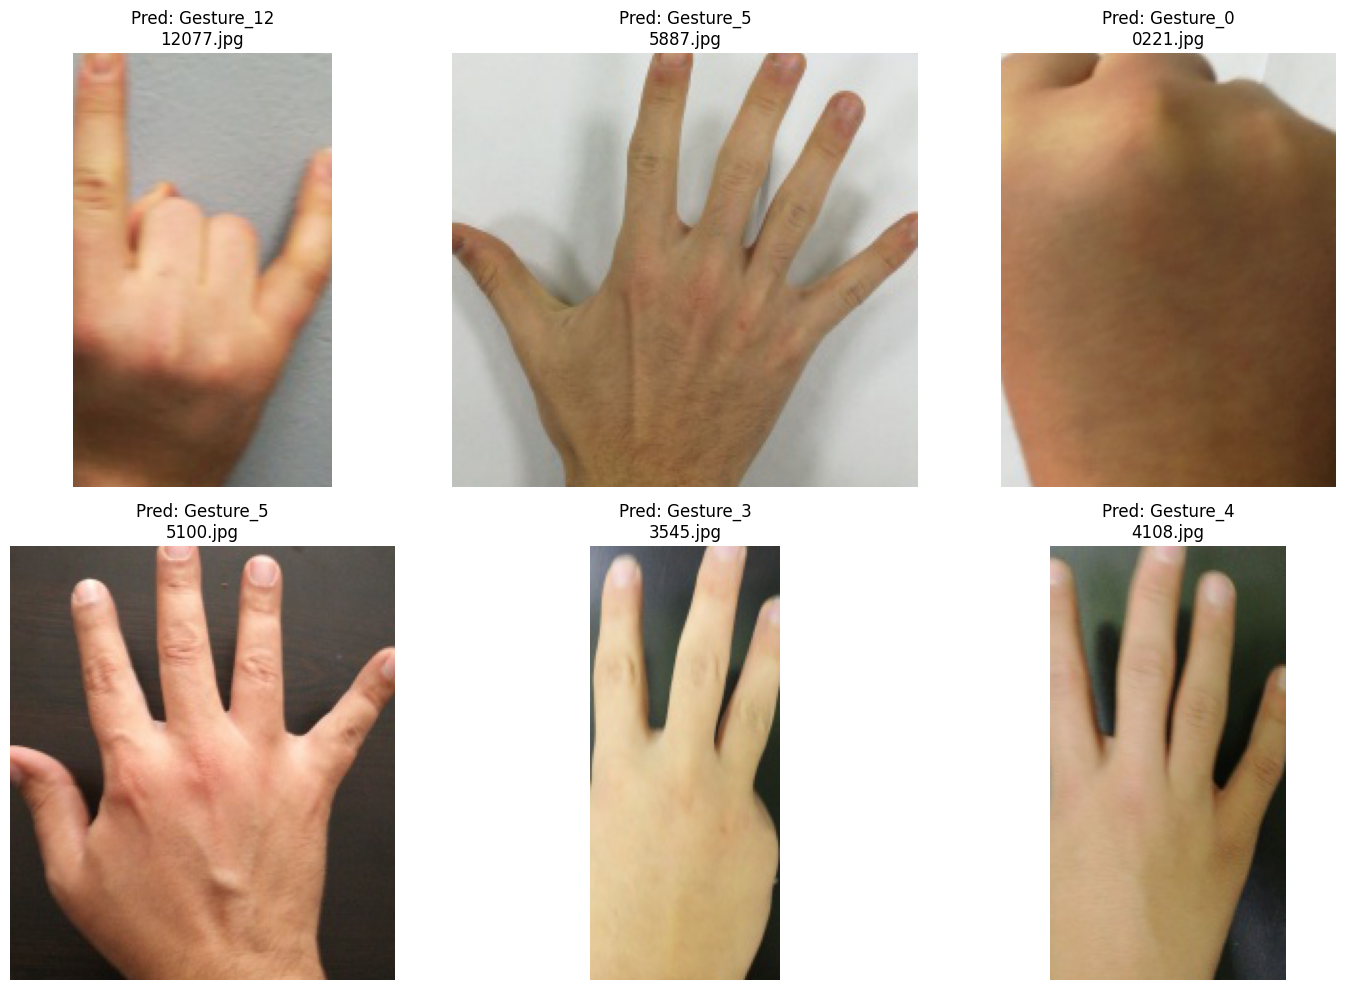

In [16]:
import os
import random
import cv2
import torch
import matplotlib.pyplot as plt
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision import transforms
from ultralytics import YOLO  # Make sure you have ultralytics installed

# Recursive image loader
def get_all_images(root_dir, exts=('.jpg', '.png')):
    images = []
    for root, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(exts):
                images.append(os.path.join(root, f))
    return images

test_dir = "./split_dataset/test/"
all_images = get_all_images(test_dir)

print(f"Found {len(all_images)} images in test directory (including subfolders).")

sample_size = min(6, len(all_images))
random_samples = random.sample(all_images, sample_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load detection model (adjust path as needed)
detection_model = YOLO("runs/detect/yolov8_hand_detector6/weights/best.pt")

# Load classification model architecture and weights
classif_model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
num_classes = 14
classif_model.classifier[1] = torch.nn.Linear(classif_model.last_channel, num_classes)
classif_model.load_state_dict(torch.load("./mobilenetv2_hand_gesture.pth", map_location=device))
classif_model = classif_model.to(device)
classif_model.eval()

# Transform for classification input
input_size = 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Correct class_to_idx mapping you gave earlier
class_to_idx = {'Gesture_0': 0, 'Gesture_1': 1, 'Gesture_10': 2, 'Gesture_11': 3,
                'Gesture_12': 4, 'Gesture_13': 5, 'Gesture_2': 6, 'Gesture_3': 7,
                'Gesture_4': 8, 'Gesture_5': 9, 'Gesture_6': 10, 'Gesture_7': 11,
                'Gesture_8': 12, 'Gesture_9': 13}

# Create class list ordered by index
classes = [None] * len(class_to_idx)
for cls_name, idx in class_to_idx.items():
    classes[idx] = cls_name

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, img_path in enumerate(random_samples):
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run detection
    results = detection_model(img_path)[0]
    boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

    if len(boxes) == 0:
        axs[i].imshow(image_rgb)
        axs[i].set_title(f"No hand detected\n{os.path.basename(img_path)}")
        axs[i].axis('off')
        continue

    # Use the first detected box for classification
    x1, y1, x2, y2 = boxes[0].astype(int)

    # Crop and transform
    cropped = image_rgb[y1:y2, x1:x2]
    input_tensor = transform(cropped).unsqueeze(0).to(device)

    # Predict class
    with torch.no_grad():
        outputs = classif_model(input_tensor)
        _, preds = torch.max(outputs, 1)
        pred_class = classes[preds.item()]

    axs[i].imshow(cropped)
    axs[i].set_title(f"Pred: {pred_class}\n{os.path.basename(img_path)}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


REAL WOLD IMAGES TEST

Found 5 images in test directory (including subfolders).

image 1/1 d:\TpRN\Projet\projetamine\RNTEST\20250516_140413.jpg: 256x192 1 hand, 38.7ms
Speed: 1.7ms preprocess, 38.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 192)

image 1/1 d:\TpRN\Projet\projetamine\RNTEST\20250516_140409.jpg: 256x192 1 hand, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 192)

image 1/1 d:\TpRN\Projet\projetamine\RNTEST\20250516_140405.jpg: 256x192 1 hand, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 192)

image 1/1 d:\TpRN\Projet\projetamine\RNTEST\20250516_140407.jpg: 256x192 1 hand, 37.0ms
Speed: 1.4ms preprocess, 37.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 192)

image 1/1 d:\TpRN\Projet\projetamine\RNTEST\20250516_140359.jpg: 256x192 1 hand, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 192)


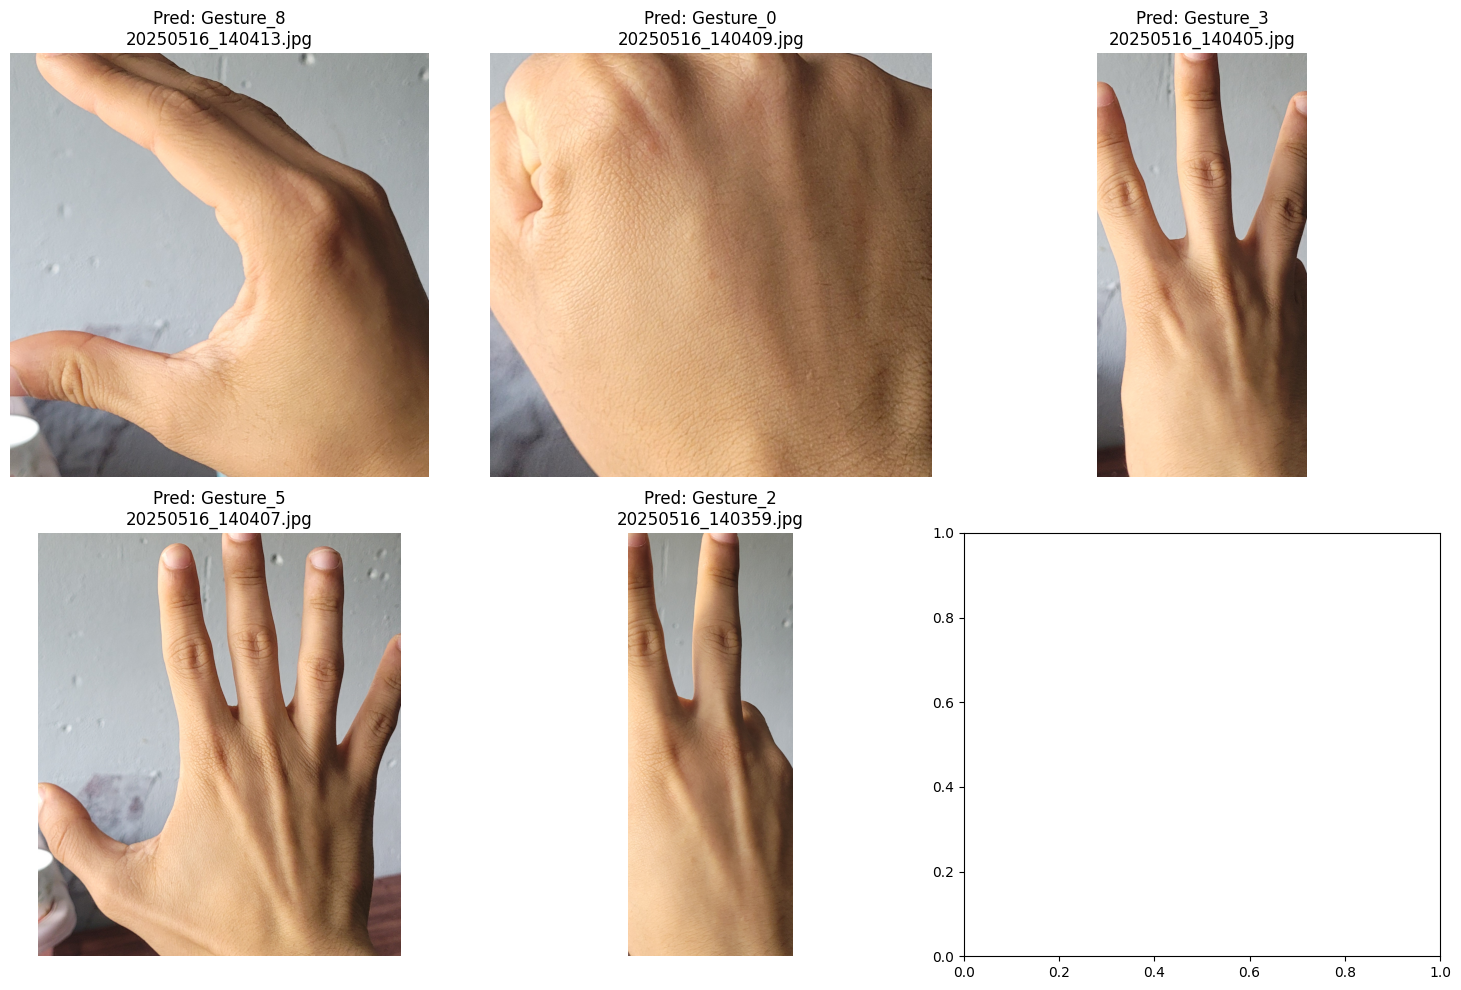

In [18]:
import os
import random
import cv2
import torch
import matplotlib.pyplot as plt
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision import transforms
from ultralytics import YOLO  # Make sure you have ultralytics installed

# Recursive image loader
def get_all_images(root_dir, exts=('.jpg', '.png')):
    images = []
    for root, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(exts):
                images.append(os.path.join(root, f))
    return images

test_dir = "./RNTEST/"
all_images = get_all_images(test_dir)

print(f"Found {len(all_images)} images in test directory (including subfolders).")

sample_size = min(6, len(all_images))
random_samples = random.sample(all_images, sample_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load detection model (adjust path as needed)
detection_model = YOLO("./models/yolo_hand_detector.pt")

# Load classification model architecture and weights
classif_model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
num_classes = 14
classif_model.classifier[1] = torch.nn.Linear(classif_model.last_channel, num_classes)
classif_model.load_state_dict(torch.load("./mobilenetv2_hand_gesture.pth", map_location=device))
classif_model = classif_model.to(device)
classif_model.eval()

# Transform for classification input
input_size = 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Correct class_to_idx mapping you gave earlier
class_to_idx = {'Gesture_0': 0, 'Gesture_1': 1, 'Gesture_10': 2, 'Gesture_11': 3,
                'Gesture_12': 4, 'Gesture_13': 5, 'Gesture_2': 6, 'Gesture_3': 7,
                'Gesture_4': 8, 'Gesture_5': 9, 'Gesture_6': 10, 'Gesture_7': 11,
                'Gesture_8': 12, 'Gesture_9': 13}

# Create class list ordered by index
classes = [None] * len(class_to_idx)
for cls_name, idx in class_to_idx.items():
    classes[idx] = cls_name

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, img_path in enumerate(random_samples):
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run detection
    results = detection_model(img_path)[0]
    boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

    if len(boxes) == 0:
        axs[i].imshow(image_rgb)
        axs[i].set_title(f"No hand detected\n{os.path.basename(img_path)}")
        axs[i].axis('off')
        continue

    # Use the first detected box for classification
    x1, y1, x2, y2 = boxes[0].astype(int)

    # Crop and transform
    cropped = image_rgb[y1:y2, x1:x2]
    input_tensor = transform(cropped).unsqueeze(0).to(device)

    # Predict class
    with torch.no_grad():
        outputs = classif_model(input_tensor)
        _, preds = torch.max(outputs, 1)
        pred_class = classes[preds.item()]

    axs[i].imshow(cropped)
    axs[i].set_title(f"Pred: {pred_class}\n{os.path.basename(img_path)}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


REAL TIME CLASSIFICATION

In [16]:
import cv2
import torch
from ultralytics import YOLO
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision import transforms
import numpy as np

# Load YOLOv8 hand detector
detector = YOLO("runs/detect/yolov8_hand_detector6/weights/best.pt")

# Load classifier
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 14
classif_model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
classif_model.classifier[1] = torch.nn.Linear(classif_model.last_channel, num_classes)
classif_model.load_state_dict(torch.load("./mobilenetv2_hand_gesture.pth", map_location=device))
classif_model.to(device).eval()

# Class names
classes = ['Gesture_0', 'Gesture_1', 'Gesture_10', 'Gesture_11', 'Gesture_12', 'Gesture_13',
           'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7',
           'Gesture_8', 'Gesture_9']

# Preprocessing for classifier
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = detector.predict(image_rgb, verbose=False)[0]

    if results.boxes is not None:
        for box in results.boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = box.astype(int)

            # Crop hand region
            hand_crop = image_rgb[y1:y2, x1:x2]

            if hand_crop.size == 0:
                continue

            # Classify
            try:
                input_tensor = transform(hand_crop).unsqueeze(0).to(device)
                with torch.no_grad():
                    output = classif_model(input_tensor)
                    _, pred = torch.max(output, 1)
                    label = classes[pred.item()]
            except Exception as e:
                label = "Error"

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Show frame
    cv2.imshow("Real-Time Hand Gesture Classification", frame)

    # Exit with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


APPLICATIONS

WITH IMAGE SEQUENCE

In [15]:
import pygame
import sys
import cv2
import torch
from ultralytics import YOLO
from torchvision.models import mobilenet_v2
from torchvision import transforms
import numpy as np
import time
import os

# Load YOLOv8 hand detector
detector = YOLO("./models/yolo_hand_detector.pt")

# Load classifier
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 14
classif_model = mobilenet_v2(weights=None)
classif_model.classifier[1] = torch.nn.Linear(classif_model.last_channel, num_classes)
classif_model.load_state_dict(torch.load("./mobilenetv2_hand_gesture.pth", map_location=device))
classif_model.to(device).eval()

# Class names
classes = ['Gesture_0', 'Gesture_1', 'Gesture_10', 'Gesture_11', 'Gesture_12', 'Gesture_13',
           'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7',
           'Gesture_8', 'Gesture_9']

# Preprocessing for classifier
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Gesture to movement mapping
gesture_to_move = {
    'Gesture_0': (0, -1),  # UP
    'Gesture_1': (0, 1),   # DOWN
    'Gesture_2': (-1, 0),  # LEFT
    'Gesture_3': (1, 0),   # RIGHT
}

# Define initial game map
game_map = [
    ['O','O','O','O','O','O'],
    ['O','S',' ','B',' ',' '],
    ['O',' ','O','R',' ',' '],
    ['O',' ',' ',' ',' ',' '],
    ['O',' ',' ',' ',' ',' '],
    ['O','O','O','O','O','O']
]

# Helper function to find player
def find_player(game_map):
    for y, row in enumerate(game_map):
        for x, cell in enumerate(row):
            if cell == 'R' or cell == '.':
                return x, y
    return None

# Movement logic
def move(dx, dy):
    global game_map
    x, y = find_player(game_map)
    nx, ny = x + dx, y + dy
    nnx, nny = x + 2*dx, y + 2*dy

    curr = game_map[y][x]

    if 0 <= ny < len(game_map) and 0 <= nx < len(game_map[0]):
        next_cell = game_map[ny][nx]
    else:
        return

    after_next = game_map[nny][nnx] if 0 <= nny < len(game_map) and 0 <= nnx < len(game_map[0]) else 'O'

    if next_cell in [' ', 'S']:
        game_map[y][x] = 'S' if curr == '.' else ' '
        game_map[ny][nx] = '.' if next_cell == 'S' else 'R'
    elif next_cell in ['B', '*'] and after_next in [' ', 'S']:
        game_map[y][x] = 'S' if curr == '.' else ' '
        game_map[ny][nx] = '.' if next_cell == '*' else 'R'
        game_map[nny][nnx] = '*' if after_next == 'S' else 'B'

# Win condition
def check_win(game_map):
    return all(cell != 'S' for row in game_map for cell in row)

# Setup pygame
pygame.init()
tile_size = 100
width, height = len(game_map[0]) * tile_size, len(game_map) * tile_size
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Sokoban - Gesture Sequence")

# Load images
player_img = pygame.transform.scale(pygame.image.load('assets/player.png'), (tile_size, tile_size))
box_img = pygame.transform.scale(pygame.image.load('assets/box.png'), (tile_size, tile_size))
storage_img = pygame.transform.scale(pygame.image.load('assets/storage.png'), (tile_size, tile_size))
wall_img = pygame.transform.scale(pygame.image.load('assets/obstacle.png'), (tile_size, tile_size))

def tint_image(img, color):
    tinted = img.copy()
    tinted.fill(color, special_flags=pygame.BLEND_RGBA_MULT)
    return tinted

# Process gesture images from folder
image_folder = "gesture_sequence"
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

for img_file in image_files:
    frame = cv2.imread(os.path.join(image_folder, img_file))
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = detector.predict(frame_rgb, verbose=False)[0]

    detected_gesture = None
    if results.boxes is not None:
        for box, cls_id in zip(results.boxes.xyxy.cpu().numpy(), results.boxes.cls.cpu().numpy()):
            x1, y1, x2, y2 = box.astype(int)
            x1, y1 = max(x1, 0), max(y1, 0)
            x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])
            hand_crop = frame_rgb[y1:y2, x1:x2]

            if hand_crop.size == 0:
                continue

            input_tensor = transform(hand_crop.astype(np.uint8)).unsqueeze(0).to(device)
            with torch.no_grad():
                output = classif_model(input_tensor)
                _, pred = torch.max(output, 1)
                label = classes[pred.item()]
                detected_gesture = label

    if detected_gesture in gesture_to_move:
        dx, dy = gesture_to_move[detected_gesture]
        move(dx, dy)

    # Draw the game
    screen.fill((0, 0, 0))
    for y, row in enumerate(game_map):
        for x, cell in enumerate(row):
            pos = (x * tile_size, y * tile_size)
            if cell == 'O':
                screen.blit(wall_img, pos)
            elif cell == 'S':
                screen.blit(storage_img, pos)
            elif cell == 'B':
                screen.blit(box_img, pos)
            elif cell == '*':
                screen.blit(storage_img, pos)
                screen.blit(tint_image(box_img, (255, 255, 0, 255)), pos)
            elif cell == 'R':
                screen.blit(player_img, pos)
            elif cell == '.':
                screen.blit(storage_img, pos)
                screen.blit(player_img, pos)

    pygame.display.flip()
    pygame.time.wait(1000)  # Delay between images

    if check_win(game_map):
        font = pygame.font.Font(None, 74)
        text = font.render("You Win!", True, (0, 255, 0))
        rect = text.get_rect(center=(width // 2, height // 2))
        screen.blit(text, rect)
        pygame.display.flip()
        pygame.time.wait(3000)
        break

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

pygame.quit()
sys.exit()

SystemExit: 

WITH REAL TIME DETECTION AND CLASSIFICATION

In [5]:
import pygame
import sys
import cv2
import torch
from ultralytics import YOLO
from torchvision.models import mobilenet_v2
from torchvision import transforms
import numpy as np
import time

# Load YOLOv8 hand detector
detector = YOLO("./models/yolo_hand_detector.pt")

# Load gesture classification model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 14
classif_model = mobilenet_v2(weights=None)
classif_model.classifier[1] = torch.nn.Linear(classif_model.last_channel, num_classes)
classif_model.load_state_dict(torch.load("./mobilenetv2_hand_gesture.pth", map_location=device))
classif_model.to(device).eval()

# Gesture labels
classes = ['Gesture_0', 'Gesture_1', 'Gesture_10', 'Gesture_11', 'Gesture_12', 'Gesture_13',
           'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7',
           'Gesture_8', 'Gesture_9']

# Image pre-processing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Gesture to movement control
gesture_to_move = {
    'Gesture_0': (0, -1),   # UP
    'Gesture_12': (0, 1),   # DOWN
    'Gesture_2': (-1, 0),   # LEFT
    'Gesture_3': (1, 0),    # RIGHT
}

# Pause/Start gestures
PAUSE_GESTURE = 'Gesture_5'
START_GESTURE = 'Gesture_4'

# Game map
game_map = [
    ['O','O','O','O','O','O','O','O','O','O'],
    ['O','S',' ',' ',' ',' ',' ','B',' ','O'],
    ['O',' ','O','O',' ','O',' ','O',' ','O'],
    ['O',' ',' ','B',' ','O',' ',' ',' ','O'],
    ['O',' ','O','O',' ','O','O','O',' ','O'],
    ['O',' ',' ',' ','R',' ',' ',' ',' ','O'],
    ['O',' ','O','O',' ','O','O','O',' ','O'],
    ['O',' ',' ','B',' ',' ',' ','S',' ','O'],
    ['O',' ',' ',' ',' ',' ',' ',' ',' ','O'],
    ['O','O','O','O','O','O','O','O','O','O']
]


def find_player(game_map):
    for y, row in enumerate(game_map):
        for x, cell in enumerate(row):
            if cell == 'R' or cell == '.':
                return x, y
    return None

def move(dx, dy):
    global game_map
    x, y = find_player(game_map)
    nx, ny = x + dx, y + dy
    nnx, nny = x + 2*dx, y + 2*dy

    curr = game_map[y][x]
    if 0 <= ny < len(game_map) and 0 <= nx < len(game_map[0]):
        next_cell = game_map[ny][nx]
    else:
        return

    after_next = game_map[nny][nnx] if 0 <= nny < len(game_map) and 0 <= nnx < len(game_map[0]) else 'O'

    if next_cell in [' ', 'S']:
        game_map[y][x] = 'S' if curr == '.' else ' '
        game_map[ny][nx] = '.' if next_cell == 'S' else 'R'
    elif next_cell in ['B', '*'] and after_next in [' ', 'S']:
        game_map[y][x] = 'S' if curr == '.' else ' '
        game_map[ny][nx] = '.' if next_cell == '*' else 'R'
        game_map[nny][nnx] = '*' if after_next == 'S' else 'B'

def check_win(game_map):
    return all(cell != 'S' for row in game_map for cell in row)

# Pygame setup
pygame.init()
pygame.display.set_caption("Sokoban - Gesture Control")
tile_size = 100
width, height = len(game_map[0]) * tile_size, len(game_map) * tile_size
screen = pygame.display.set_mode((width, height))

# Load assets
player_img = pygame.transform.scale(pygame.image.load('assets/player.png').convert_alpha(), (tile_size, tile_size))
box_img = pygame.transform.scale(pygame.image.load('assets/box.png').convert_alpha(), (tile_size, tile_size))
storage_img = pygame.transform.scale(pygame.image.load('assets/storage.png').convert_alpha(), (tile_size, tile_size))
wall_img = pygame.transform.scale(pygame.image.load('assets/obstacle.png').convert_alpha(), (tile_size, tile_size))

def tint_image(img, color):
    tinted = img.copy()
    tinted.fill(color, special_flags=pygame.BLEND_RGBA_MULT)
    return tinted

# Game state
cap = cv2.VideoCapture(0)
clock = pygame.time.Clock()
game_running = True
paused = True
last_move_time = 0
move_delay = 1.0  # seconds

# Game loop
while game_running:
    ret, frame = cap.read()
    if not ret:
        break

    # Enhance frame
    alpha = 1.2
    beta = 10
    frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = detector.predict(frame_rgb, verbose=False)[0]

    detected_gesture = None
    if results.boxes is not None and len(results.boxes) > 0:
        for box in results.boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = box.astype(int)
            x1, y1 = max(x1, 0), max(y1, 0)
            x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

            hand_crop = frame_rgb[y1:y2, x1:x2]
            if hand_crop.size == 0:
                continue

            hand_crop = hand_crop.astype(np.uint8)
            input_tensor = transform(hand_crop).unsqueeze(0).to(device)
            with torch.no_grad():
                output = classif_model(input_tensor)
                _, pred = torch.max(output, 1)
                detected_gesture = classes[pred.item()]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, detected_gesture, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
            break

    # Gesture-based state control
    current_time = time.time()

    if detected_gesture == START_GESTURE:
        paused = False
    elif detected_gesture == PAUSE_GESTURE:
        paused = True

    if not paused and detected_gesture in gesture_to_move and (current_time - last_move_time) > move_delay:
        dx, dy = gesture_to_move[detected_gesture]
        move(dx, dy)
        last_move_time = current_time

    # Render game
    screen.fill((0, 0, 0))
    for y, row in enumerate(game_map):
        for x, cell in enumerate(row):
            pos = (x * tile_size, y * tile_size)
            if cell == 'O':
                screen.blit(wall_img, pos)
            elif cell == 'S':
                screen.blit(storage_img, pos)
            elif cell == 'B':
                screen.blit(box_img, pos)
            elif cell == '*':
                screen.blit(storage_img, pos)
                screen.blit(tint_image(box_img, (255, 255, 0, 255)), pos)
            elif cell == 'R':
                screen.blit(player_img, pos)
            elif cell == '.':
                screen.blit(storage_img, pos)
                screen.blit(player_img, pos)

    # Show camera feed
    frame_small = cv2.resize(frame, (200, 150))
    frame_rgb_small = cv2.cvtColor(frame_small, cv2.COLOR_BGR2RGB)
    cam_surface = pygame.surfarray.make_surface(np.rot90(frame_rgb_small))
    screen.blit(cam_surface, (width - 200, 0))

    # Show pause text
    if paused:
        font = pygame.font.Font(None, 60)
        text = font.render("Paused", True, (255, 255, 0))
        screen.blit(text, text.get_rect(center=(width // 2, 50)))

    # Check win
    if check_win(game_map):
        font = pygame.font.Font(None, 74)
        text = font.render("You Win!", True, (0, 255, 0))
        screen.blit(text, text.get_rect(center=(width // 2, height // 2)))
        pygame.display.flip()
        pygame.time.wait(3000)
        game_running = False

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_running = False

    pygame.display.flip()
    clock.tick(10)

cap.release()
pygame.quit()
sys.exit()


pygame 2.6.1 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ramin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
